__author__ = "Elias El Otmani"
__credits__ = "Thomas Fontaine"
__email__ = "elias.el.otmani@ens.psl.eu"

Description : Analysis of pre-simulated DMTS data 

In [1]:
import numpy as np
from numpy import nan
import os, sys, time, torch
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from CCM import CCM
from DMTS import DMTS

# Single population

In [2]:
computer = "cpu"
dev_str = 'cpu'
cores = 6
num_workers = 4 * cores
enc = torch.float64
dev = torch.device(computer)

info = False
reject = False 
plot = False 

mod_prm = torch.as_tensor([.020, 0.007, .600, 3, 0., 1.9, 2.6, 1.5, 1.2, 7., 7., 7., 7., 1/26, 1, 1], device=dev, dtype=enc)
sim_prm = torch.as_tensor([6., 0.001, 1e-12, 1e-3, nan], device=dev, dtype=enc)

## First explorations

In [6]:
#mod_prm[3] = 2.2

task_prm = [30, 1, 0.05, (0.2,0.3), (2, 2.1), (3.,3.1)]
#task_prm = [6, 2, 0.2, (0.2,0.3), (2, 2.1), (3.,3.1)]

Ae, Ap, As, Av = 169, 268, 709, 634
dof = torch.as_tensor([
    
    Ae, Ap, As, Av, # Ae, Ap, As, Av (4)
    # wee,    wpe,     wse,     wes,     wvs,     wep,     wpp,     wsp,     wev,     wsv (10) :
    .136*Ae, .075*Ap, .045*As, .053*Ae, .04*Av, .17*Ae, .093*Ap, .0*As, .053*Ae, .001*As, 
    4.4, 4.8, 2.7, 1.9, # Ie_ext, Ip_ext, Is_ext, Iv_ext (5)
    0.2, .0265*Ae, 25 # q, J_adp, sigma (3)
    
], device=dev, dtype=enc)

In [8]:
distractor_amplitude = 2.5
ccm = CCM(dof, mod_prm, sim_prm, two_columns = True)
%time dmts = DMTS(ccm, task_prm = task_prm, distractor = True, distractor_amplitude = distractor_amplitude, distractor_timing = 2, distractor_duration = 0.2)

Wall time: 9min 49s


In [9]:
dmts.print_stats()

# 0.78 0.57 for 0.275
# 0.82 	 0.75 for 0.265 --> good enough

Number of trials :	 30 
Successful operations :	 27 	 24 	 8 
Ratios :		 0.9 	 0.8 	 0.27


<module 'matplotlib.pyplot' from 'C:\\Users\\elias\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

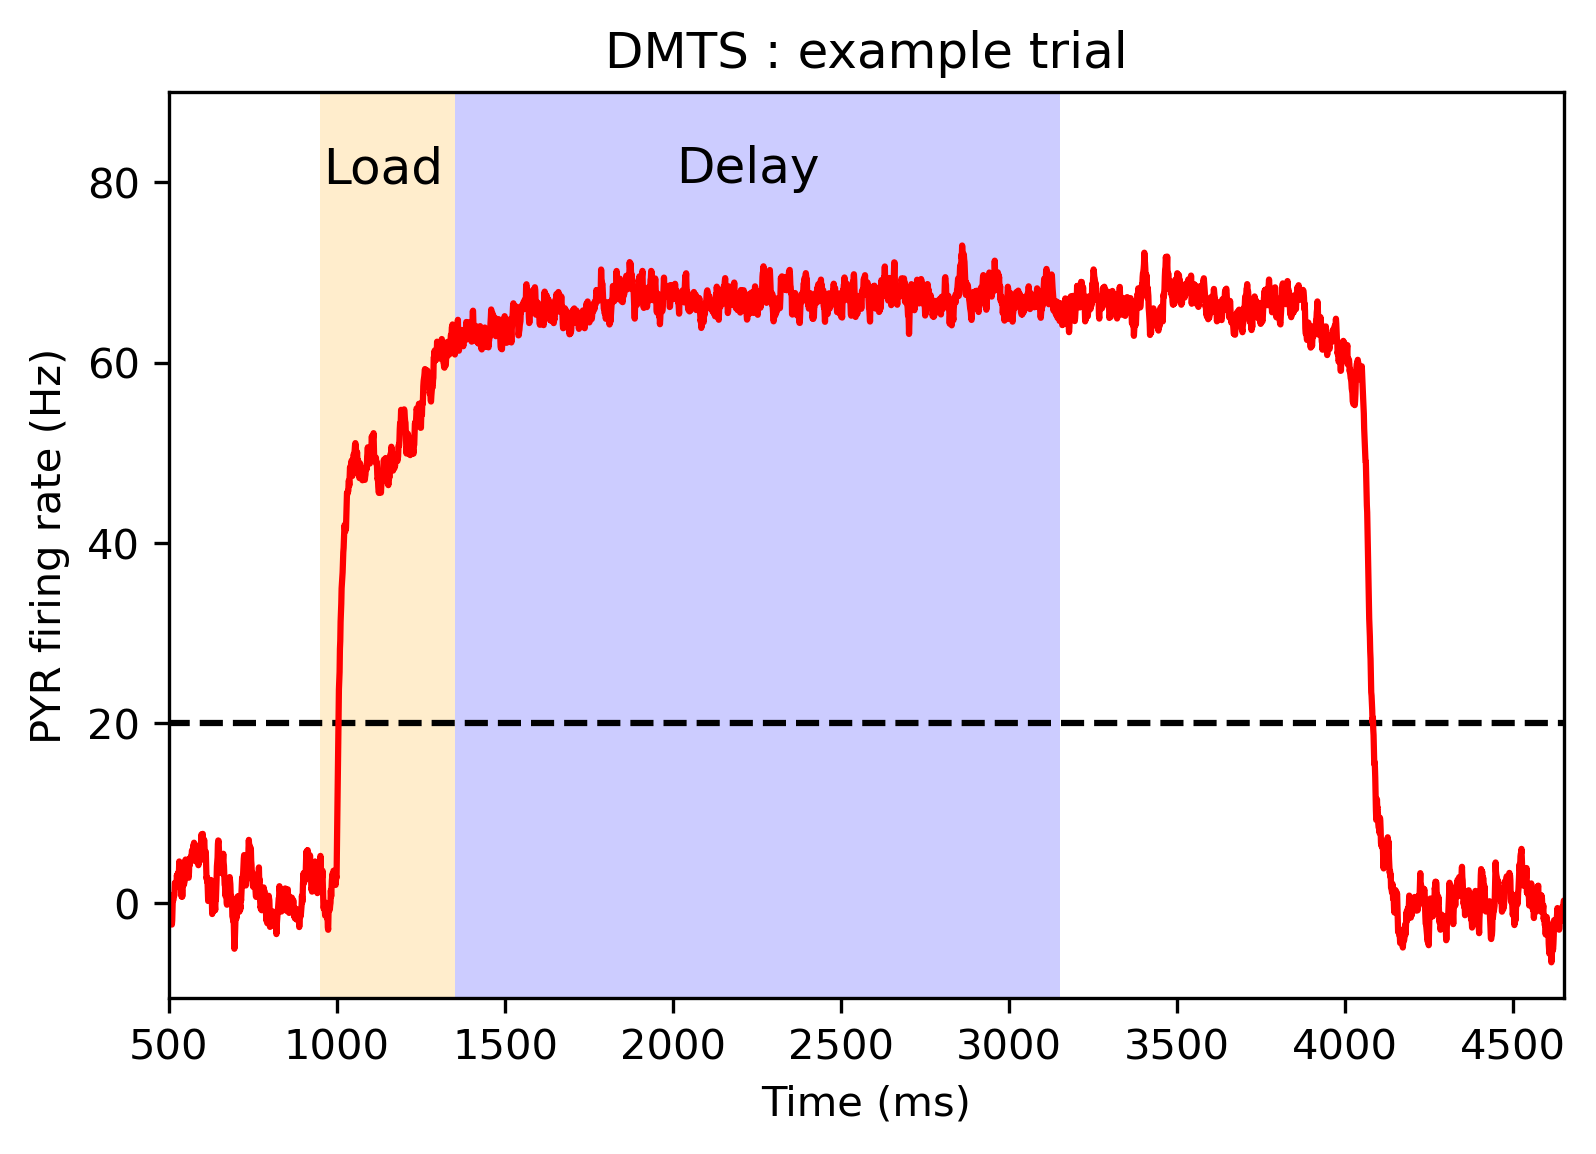

In [26]:
dmts.plot_trials(1, save = False, save_as = 'plots/Fig1/B-DMTS_example_trial_success_210707.png')
#plt.savefig('plots/DMTS_example_trial_20210516.png')

## INs' Iext impact on memory stats

In [3]:
load_som = np.load('output_data/load_som.npy')
delay_som = np.load('output_data/delay_som.npy')
load_pv = np.load('output_data/load_pv.npy')
delay_pv = np.load('output_data/delay_pv.npy')
load_vip = np.load('output_data/load_alpha5.npy')
delay_vip = np.load('output_data/delay_alpha5.npy')
load_MCI = np.load('output_data/load_pv_som.npy')
delay_MCI = np.load('output_data/delay_pv_som.npy')

In [3]:
load_som =[0.7833333333333333, 0.8666666666666667, 0.7666666666666667, 0.9833333333333333, 0.8, 0.8833333333333333, 0.9333333333333333, 0.9, 1.0, 0.6833333333333333, 0.8166666666666667, 0.7333333333333333, 0.85, 0.7, 0.9, 0.7333333333333333, 0.8, 0.9333333333333333, 0.7833333333333333, 0.9, 0.8666666666666667, 0.85, 0.8, 0.8666666666666667, 0.8666666666666667, 0.9166666666666666, 0.9333333333333333, 0.7, 0.7666666666666667, 0.85, 0.8333333333333334, 0.8666666666666667, 0.8666666666666667, 0.9166666666666666, 0.7833333333333333, 0.8666666666666667, 0.7833333333333333, 0.85, 0.85, 0.8333333333333334, 0.9166666666666666, 0.7, 0.9333333333333333, 0.8666666666666667, 0.6666666666666666, 0.7, 0.8666666666666667, 0.9333333333333333, 0.8666666666666667, 0.6166666666666667, 0.7166666666666667, 0.85, 0.8, 0.7666666666666667, 0.7333333333333333, 0.48333333333333334, 0.6, 0.7, 0.6833333333333333, 0.8, 0.43333333333333335, 0.8666666666666667, 0.85, 0.75, 0.85, 0.8, 0.6, 0.5166666666666667, 0.55, 0.5666666666666667, 0.5833333333333334, 0.7166666666666667, 0.5, 0.4, 0.6833333333333333, 0.6, 0.31666666666666665, 0.43333333333333335, 0.35, 0.4666666666666667, 0.45, 0.11666666666666667, 0.3333333333333333, 0.11666666666666667, 0.21666666666666667, 0.0, 0.0, 0.0, 0.06666666666666667, 0.15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
delay_som = [0.5666666666666667, 0.8166666666666667, 0.7, 0.9833333333333333, 0.75, 0.8833333333333333, 0.8666666666666667, 0.9, 0.9, 0.6833333333333333, 0.6833333333333333, 0.7333333333333333, 0.7, 0.5833333333333334, 0.8333333333333334, 0.7333333333333333, 0.8, 0.8666666666666667, 0.6666666666666666, 0.8333333333333334, 0.8333333333333334, 0.7166666666666667, 0.8, 0.5833333333333334, 0.8, 0.8, 0.9333333333333333, 0.6333333333333333, 0.5666666666666667, 0.7833333333333333, 0.6833333333333333, 0.8666666666666667, 0.8, 0.8333333333333334, 0.65, 0.7333333333333333, 0.7166666666666667, 0.7833333333333333, 0.85, 0.6333333333333333, 0.7333333333333333, 0.6333333333333333, 0.85, 0.7833333333333333, 0.5166666666666667, 0.6333333333333333, 0.7833333333333333, 0.8, 0.8, 0.6166666666666667, 0.5, 0.4166666666666667, 0.7333333333333333, 0.6, 0.45, 0.4666666666666667, 0.4666666666666667, 0.6, 0.35, 0.6666666666666666, 0.36666666666666664, 0.45, 0.31666666666666665, 0.06666666666666667, 0.2833333333333333, 0.3333333333333333, 0.21666666666666667, 0.13333333333333333, 0.26666666666666666, 0.2, 0.15, 0.0, 0.06666666666666667, 0.08333333333333333, 0.13333333333333333, 0.11666666666666667, 0.05, 0.0, 0.06666666666666667, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06666666666666667, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06666666666666667]
load_vip = [0.8666666666666667, 0.9333333333333333, 0.8166666666666667, 0.9333333333333333, 1.0, 0.8666666666666667, 0.8166666666666667, 0.6833333333333333, 0.9333333333333333, 0.95, 0.8333333333333334, 0.9333333333333333, 0.8666666666666667, 0.7833333333333333, 0.95, 0.8833333333333333, 0.85, 0.7333333333333333, 0.8, 0.8, 0.8666666666666667, 0.95, 0.8, 0.75, 0.8666666666666667, 0.8666666666666667, 0.75, 0.8, 0.8, 0.7833333333333333, 0.8333333333333334, 0.8666666666666667, 0.6666666666666666, 0.8, 0.8166666666666667, 0.8, 0.7666666666666667, 0.7666666666666667, 0.9, 0.8666666666666667, 0.6833333333333333, 0.8833333333333333, 0.8, 0.95, 0.9333333333333333, 0.7833333333333333, 0.8333333333333334, 0.9, 0.8833333333333333, 0.8166666666666667, 0.7, 0.8166666666666667, 0.7666666666666667, 0.7333333333333333, 0.8, 0.7333333333333333, 0.7833333333333333, 0.7, 0.6666666666666666, 0.85, 0.55, 0.5833333333333334, 0.5166666666666667, 0.7666666666666667, 0.5833333333333334, 0.6, 0.43333333333333335, 0.4166666666666667, 0.55, 0.5166666666666667, 0.48333333333333334, 0.31666666666666665, 0.13333333333333333, 0.5333333333333333, 0.3, 0.26666666666666666, 0.23333333333333334, 0.26666666666666666, 0.8666666666666667, 0.38333333333333336, 0.36666666666666664, 0.21666666666666667, 0.18333333333333332, 0.3333333333333333, 0.11666666666666667, 0.3, 0.1, 0.13333333333333333, 0.06666666666666667, 0.2, 0.06666666666666667, 0.06666666666666667, 0.08333333333333333, 0.06666666666666667, 0.21666666666666667, 0.18333333333333332, 0.11666666666666667, 0.18333333333333332, 0.13333333333333333, 0.06666666666666667]
delay_vip = [0.5666666666666667, 0.43333333333333335, 0.55, 0.6, 0.6833333333333333, 0.2833333333333333, 0.55, 0.5333333333333333, 0.6, 0.55, 0.55, 0.5, 0.4666666666666667, 0.5666666666666667, 0.65, 0.5833333333333334, 0.65, 0.5833333333333334, 0.38333333333333336, 0.5333333333333333, 0.7166666666666667, 0.5333333333333333, 0.5666666666666667, 0.55, 0.5333333333333333, 0.55, 0.35, 0.5333333333333333, 0.38333333333333336, 0.5666666666666667, 0.4166666666666667, 0.7833333333333333, 0.5333333333333333, 0.4666666666666667, 0.6333333333333333, 0.6166666666666667, 0.65, 0.45, 0.4, 0.75, 0.48333333333333334, 0.9333333333333333, 0.7333333333333333, 0.8333333333333334, 0.8, 0.6833333333333333, 0.7, 0.8333333333333334, 0.6166666666666667, 0.6833333333333333, 0.48333333333333334, 0.7, 0.5666666666666667, 0.43333333333333335, 0.5, 0.6, 0.7166666666666667, 0.5833333333333334, 0.4, 0.4666666666666667, 0.38333333333333336, 0.26666666666666666, 0.31666666666666665, 0.25, 0.38333333333333336, 0.3333333333333333, 0.2, 0.25, 0.11666666666666667, 0.06666666666666667, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06666666666666667, 0.5166666666666667, 0.31666666666666665, 0.36666666666666664, 0.21666666666666667, 0.15, 0.3333333333333333, 0.11666666666666667, 0.43333333333333335, 0.16666666666666666, 0.06666666666666667, 0.06666666666666667, 0.2, 0.06666666666666667, 0.06666666666666667, 0.15, 0.06666666666666667, 0.21666666666666667, 0.18333333333333332, 0.11666666666666667, 0.18333333333333332, 0.13333333333333333, 0.06666666666666667]
load_pv = [0.0, 0.0, 0.0, 0.05, 0.0, 0.0, 0.0, 0.0, 0.06666666666666667, 0.0, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.05, 0.13333333333333333, 0.08333333333333333, 0.13333333333333333, 0.0, 0.05, 0.06666666666666667, 0.06666666666666667, 0.0, 0.06666666666666667, 0.13333333333333333, 0.06666666666666667, 0.0, 0.15, 0.13333333333333333, 0.05, 0.11666666666666667, 0.016666666666666666, 0.2, 0.06666666666666667, 0.0, 0.0, 0.2, 0.11666666666666667, 0.25, 0.4, 0.25, 0.2, 0.26666666666666666, 0.23333333333333334, 0.2833333333333333, 0.5, 0.45, 0.4166666666666667, 0.8333333333333334, 0.55, 1.0, 0.8666666666666667, 0.9666666666666667, 1.0, 0.9333333333333333, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
delay_pv = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06666666666666667, 0.0, 0.0, 0.06666666666666667, 0.0, 0.0, 0.0, 0.0, 0.0, 0.016666666666666666, 0.05, 0.18333333333333332, 0.2, 0.25, 0.06666666666666667, 0.13333333333333333, 0.16666666666666666, 0.2, 0.21666666666666667, 0.38333333333333336, 0.2833333333333333, 0.7, 0.23333333333333334, 0.8, 0.6166666666666667, 0.9, 0.9333333333333333, 0.8666666666666667, 0.95, 0.7833333333333333, 1.0, 0.8833333333333333, 1.0, 0.9333333333333333, 1.0, 0.9333333333333333, 0.9333333333333333, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

# DMTS from Frontex

## Imports & pre-processing

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.signal import savgol_filter
import os

from statsmodels.stats.proportion import proportion_confint

In [2]:
def load_frontex_data(directory, filename, outer_directory = 'brand_new_data', indexes = None): # Outputs a data vector or matrix, first dimension = jobID
    data = []
    path1 = outer_directory + '/' + directory
    datalist = os.listdir(path1)
    if indexes is None : 
        for i in range(len(datalist)):
            with open(path1 + '/' + filename + '_' + str(i) + '.npy', 'rb') as f:
                data.append(np.load(f))
    else : 
        for i in indexes : 
            with open(path1 + '/' + filename + '_' + str(i) + '.npy', 'rb') as f:
                data.append(np.load(f))
    return np.array(data)

In [19]:
detections = load_frontex_data('detections', 'detection')
detections = detections[:-1, :-1] # We get rid of intensity = 3.6 pA and duration = 202 ms.

jadps = load_frontex_data('pick_jadp', 'jadp')

dist_amp = load_frontex_data('pick_distractor_amp', 'dAmp')
dist_amp_pdr1 = load_frontex_data('pick_distractor_amp_pdr1', 'dAmp')

nicTrans_data = load_frontex_data('nicTrans_dmts_4', 'nicTrans_dmts')
trans_stats = [nicTrans_data[:,i] for i in range(nicTrans_data.shape[1])]
[nicTrans, nicTrans_kam, nicTrans_norm, nicTrans_kam_norm] = trans_stats

data_classic = load_frontex_data('classic_dmts', 'dmts')
popStats = [data_classic[:,i] for i in range(data_classic.shape[1])]
[load_vip, delay_vip, load_pv, delay_pv, load_som, delay_som, load_MCI, delay_MCI, trash, trash] = popStats
data_classic_ACh = load_frontex_data('classic_dmts_Ach', 'dmts_ach')
popStats_ACh = [data_classic_ACh[:,i] for i in range(data_classic_ACh.shape[1])]
[load_ACh, delay_ACh] = popStats_ACh

data_distracted = load_frontex_data('distracted_dmts', 'ddmts')
dpopStats = [data_distracted[:,i] for i in range(data_distracted.shape[1])]
[load_vip_dis, delay_vip_dis, load_pv_dis, delay_pv_dis, load_som_dis, delay_som_dis, load_MCI_dis, delay_MCI_dis] = dpopStats

data_distracted_ACh = load_frontex_data('distracted_dmts_Ach', 'ddmts_ach')
dpopStats_ACh = [data_distracted_ACh[:,i] for i in range(data_distracted_ACh.shape[1])]
[load_ACh_dis, delay_ACh_dis] = dpopStats_ACh

data_distracted_pdr1 = load_frontex_data('distracted_dmts_pdr1', 'ddmts')
dpopStats_pdr1 = [data_distracted_pdr1[:,i] for i in range(data_distracted_pdr1.shape[1])]
[load_vip_dis1, delay_vip_dis1, load_pv_dis1, delay_pv_dis1, load_som_dis1, delay_som_dis1, load_MCI_dis1, delay_MCI_dis1, load_ACh_dis1, delay_ACh_dis1] = dpopStats_pdr1

data_distracted_pdr1_amp0 = load_frontex_data('distracted_dmts_pdr1_amp0', 'ddmts')
dpopStats_pdr1_amp0 = [data_distracted_pdr1_amp0[:,i] for i in range(data_distracted_pdr1_amp0.shape[1])]
[load_vip_dis1_amp0, delay_vip_dis1_amp0, load_pv_dis1_amp0, delay_pv_dis1_amp0, load_som_dis1_amp0, delay_som_dis1_amp0, load_MCI_dis1_amp0, delay_MCI_dis1_amp0, load_ACh_dis1_amp0, delay_ACh_dis1_amp0] = dpopStats_pdr1_amp0

indexes = np.concatenate((np.linspace(-50,-1), np.linspace(100,150))).astype(int)
mci_distracted_pdr1_amp0_extremes = load_frontex_data('distracted_dmts_pdr1_amp0_extremes', 'ddmts', indexes = indexes)
mci_dpopStats_pdr1_amp0_extremes = [mci_distracted_pdr1_amp0_extremes[:,i] for i in range(mci_distracted_pdr1_amp0_extremes.shape[1])]
mci_lower_end = [data[:50] for data in mci_dpopStats_pdr1_amp0_extremes]
mci_upper_end = [data[50:] for data in mci_dpopStats_pdr1_amp0_extremes]
fullStats = [np.concatenate((lower, middle, upper), 0) for (lower, middle, upper) in zip(mci_lower_end, np.vstack((load_MCI_dis1_amp0, delay_MCI_dis1_amp0)), mci_upper_end)]
[load_MCI_dis1_amp0_long, delay_MCI_dis1_amp0_long] = fullStats


indexes = np.concatenate((np.linspace(-100,-49), np.linspace(151,200))).astype(int)
data_distracted_pdr1_extremes = load_frontex_data('distracted_dmts_pdr1_extremes', 'ddmts', indexes = indexes)
dpopStats_pdr1_extremes = [data_distracted_pdr1_extremes[:,i] for i in range(data_distracted_pdr1_extremes.shape[1])]
lower_end = [data[:50] for data in dpopStats_pdr1_extremes]
upper_end = [data[50:] for data in dpopStats_pdr1_extremes]
fullStats = [np.concatenate((lower, middle, upper), 0) for (lower, middle, upper) in zip(lower_end, dpopStats_pdr1, upper_end)]
[load_vip_dis1, delay_vip_dis1, load_pv_dis1, delay_pv_dis1, load_som_dis1, delay_som_dis1, load_MCI_dis1, delay_MCI_dis1, load_ACh_dis1, delay_ACh_dis1] = fullStats

a5nicTrans_data = load_frontex_data('a5snp_transient', 'a5snp_trans')
a5trans_stats = [a5nicTrans_data[:,i] for i in range(a5nicTrans_data.shape[1])]
[a5nicTrans_bloem, a5nicTrans_kamigaki] = a5trans_stats

nic_restoration = load_frontex_data('nicotine_restoration', 'nicotine')
nicrest_stats = [nic_restoration[:,i] for i in range(nic_restoration.shape[1])]
[nicotine_bloem_healthy, nicotine_bloem_a5snp, nicotine_kamigaki_healthy, nicotine_kamigaki_a5snp] = nicrest_stats

## Figure 2 - DMTS methods

### Itrans detection

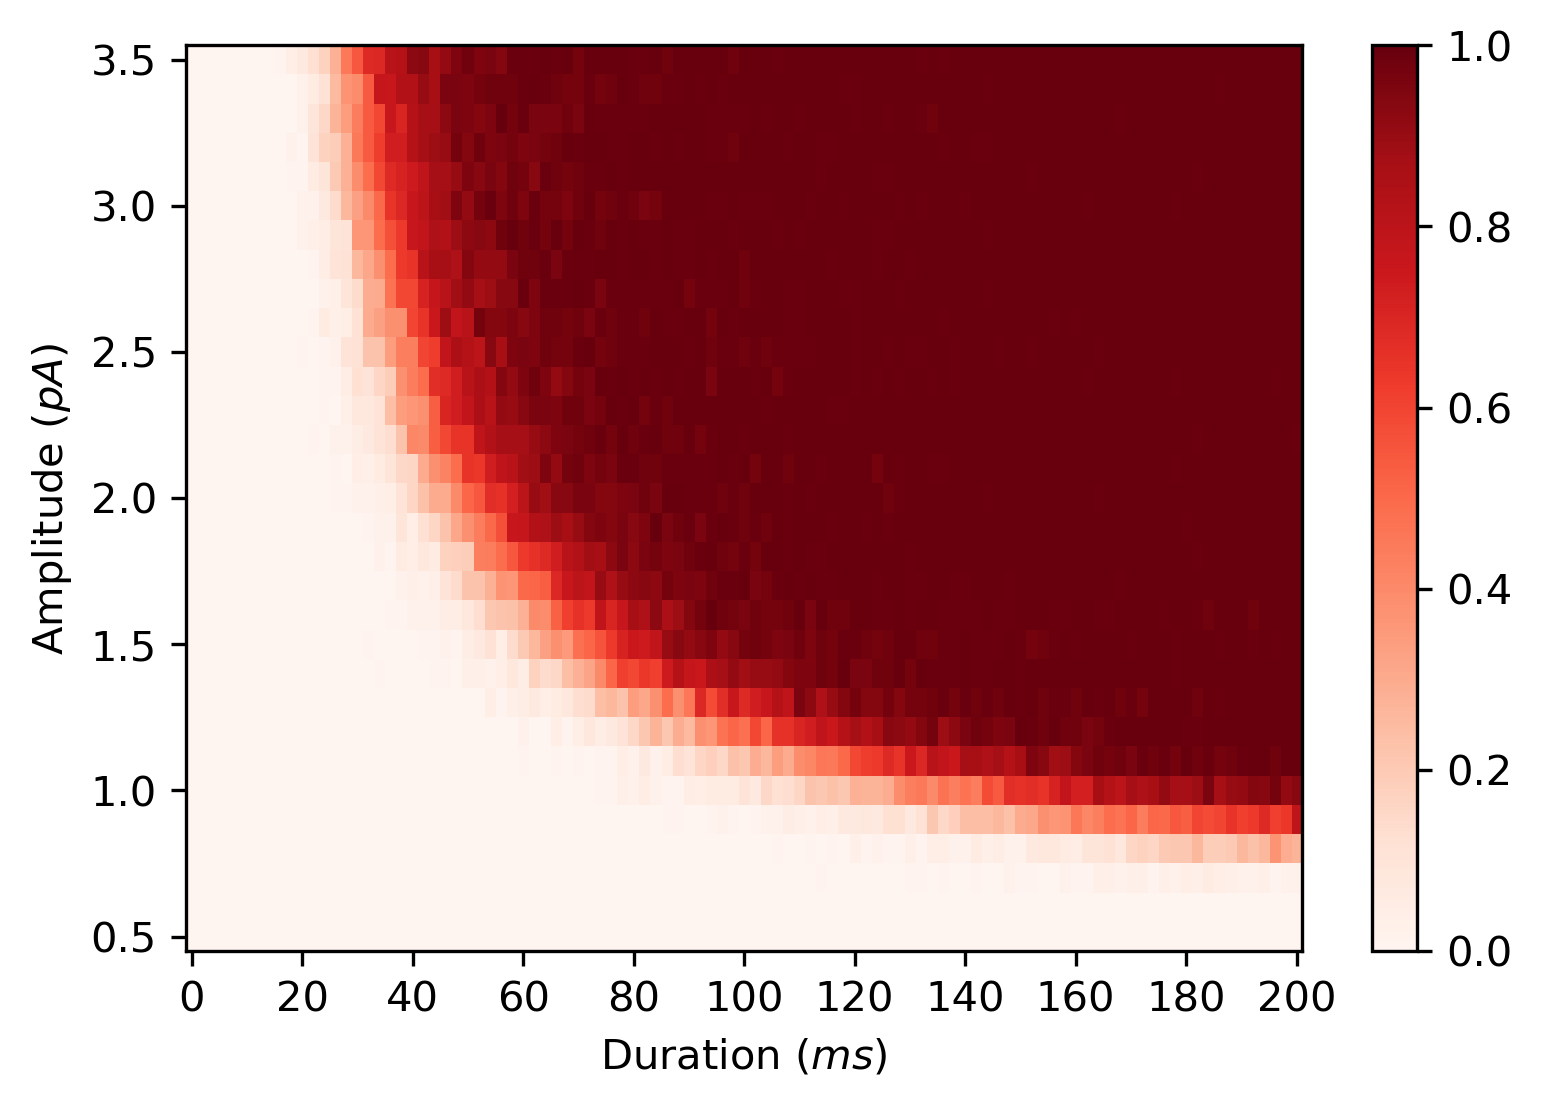

In [5]:
dim_durations = detections.shape[0]
dim_intensities = detections.shape[1]

# Hacking first col & row (last once transposed) so that we get to round numbers
newdet = np.zeros((detections.shape[0]+1, detections.shape[1]+1))
newdet[1:,1:] = detections
newdet[0,1:] = detections[0,:]
newdet[1:,0] = detections[:,0]
detections = newdet

xlabels = np.linspace(0, 200, 11).round(decimals = 0).astype(int)
ylabels = np.linspace(0.5, 3.5, 7) #7 to have 0.5 as spacing

x_indexes = np.linspace(0, 100, 11) # corresponding indexes for the above defined ticks
y_indexes = np.linspace(0, 30, 7)

fig, ax = plt.subplots(dpi=300) # figsize=(8, 5) 

#plt.figure(figsize=(10, 10), dpi=80)
heatmap = ax.imshow(np.transpose(detections), origin = 'lower', cmap = 'Reds', aspect = 'auto')#, extent = [2 , 204, 0.5 , 3.6])
#plt.xticks([range(8)], ['a','b','c','d','e','f','g','h'])
#plt.xticks(range(dim_durations), [0.002*(1+i) for i in range(dim_durations)])
#plt.yticks(range(dim_intensities), [0.5 + 0.1*i for i in range(dim_intensities)])
ax.set_xticks(x_indexes)
ax.set_yticks(y_indexes)
ax.set_xticklabels(xlabels)
ax.set_yticklabels(ylabels)
plt.ylabel('Amplitude $(pA)$')
plt.xlabel('Duration ($ms$)')
#plt.title('P($detection$) as a function of I$trans$', size = 20, pad = 10)
plt.colorbar(heatmap, shrink=1, aspect=20)

#plt.savefig('plots/Fig1/E-P(detection)Itrans_210707.png', dpi = 300)
plt.show()

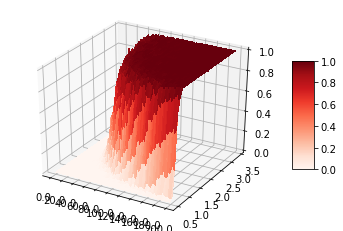

In [57]:
X = np.arange(dim_durations)
Y = np.arange(dim_intensities)
X, Y = np.meshgrid(X, Y)
Z = np.transpose(detections)

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='Reds', linewidth=0, antialiased=False)
ax.set_xticks(x_indexes)
ax.set_yticks(y_indexes)
ax.set_xticklabels(xlabels)
ax.set_yticklabels(ylabels)
#fig.scatter(X,Y,Z)
#ax.set_zlim(-0.1, 1.01)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

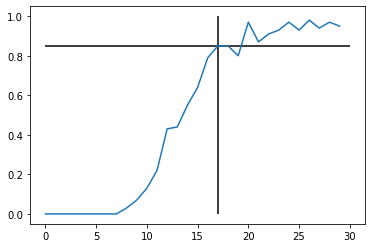

In [13]:
detection_50 = detections[25,:] # Detections at 50ms (correspond to index 25)
detection_50.shape

plt.plot(detection_50)
plt.hlines(y = 0.85, xmin = 0, xmax = 30)
plt.vlines(x = 17, ymin = 0, ymax = 1) # Index 16 corresponds to Itrans = 2.2

### Jadp

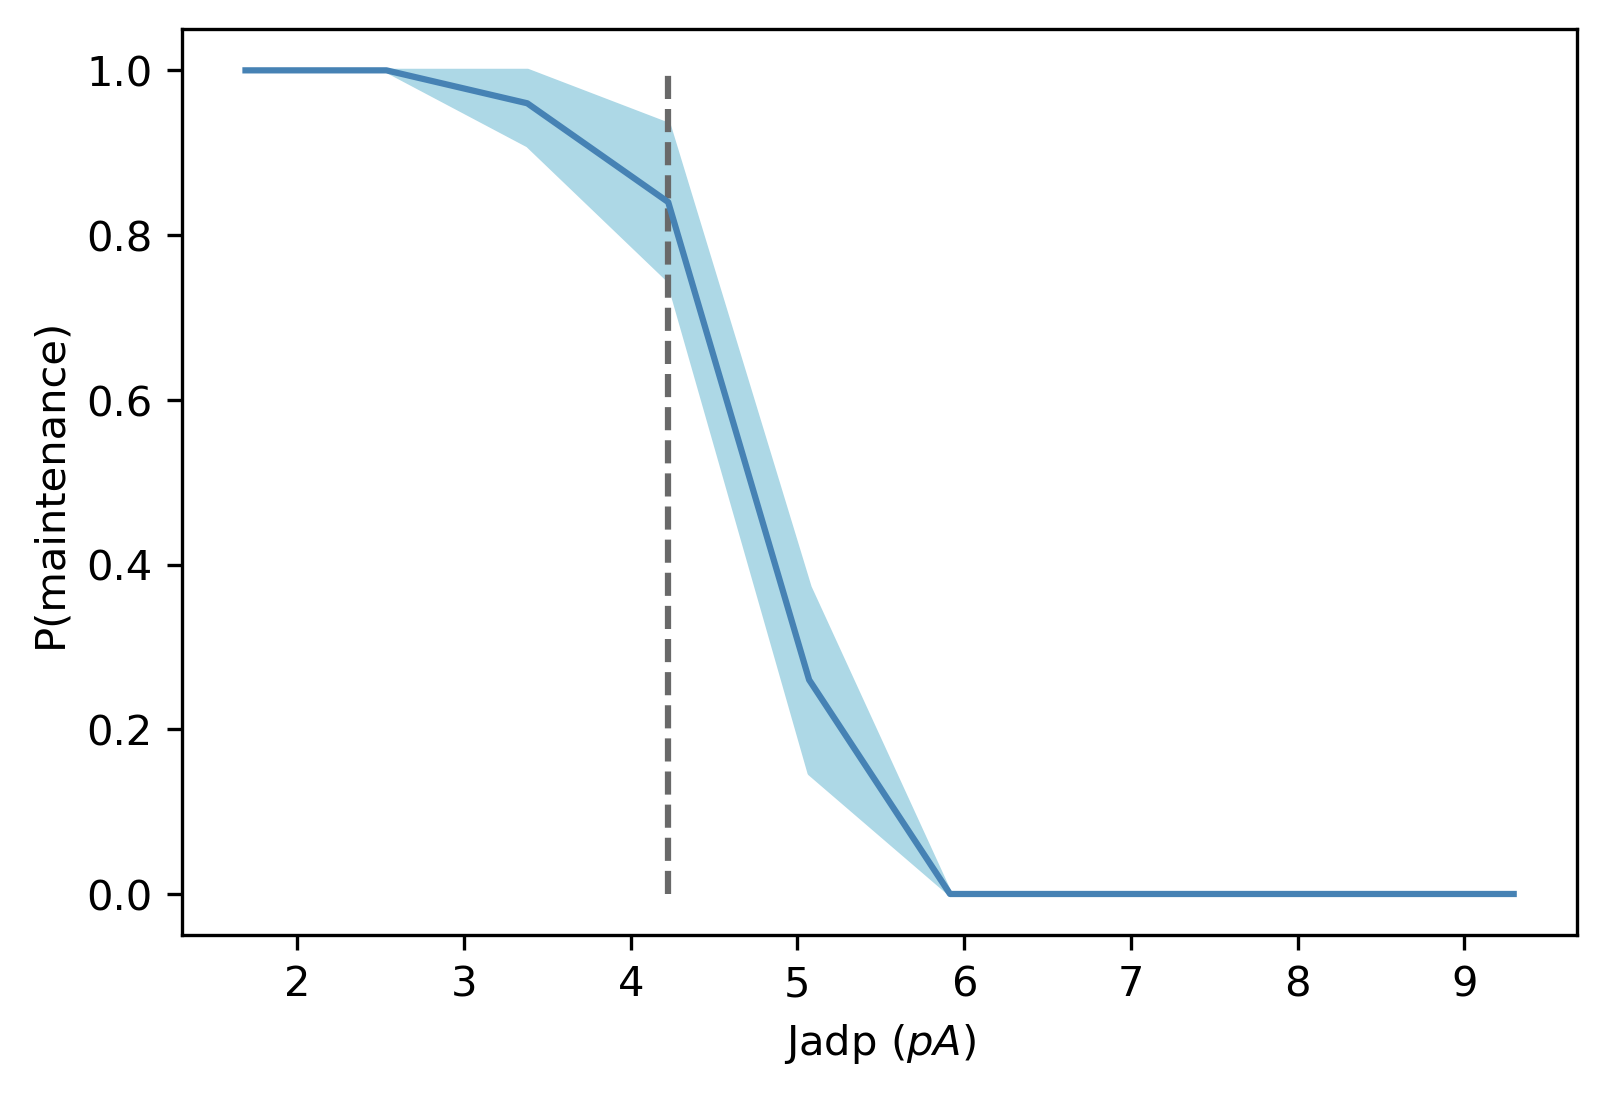

In [18]:
jadps = jadps[:10]
error = proportion_confint(jadps*100, 100, 0.01)
x = [(0.01 + i*0.005)*Ae for i in range(len(jadps))]
fig, ax = plt.subplots(dpi=300)
ax.plot(x, jadps, color = 'steelblue')   # Index 3 = 0.84, corresponds to Jadp = 0.025
ax.vlines(0.025*Ae, 0, 1, linestyle = '--', color = 'dimgrey')
ax.set_xlabel('Jadp $(pA)$')
ax.set_ylabel('P(maintenance)')
ax.fill_between(x, error[0], error[1], alpha = 1, color = 'lightblue') 

plt.savefig('plots/Fig2/F-Jadp.png')

## Figure 3 - Old vs new model

### No STP

In [39]:
load_som_nostp =[0.7833333333333333, 0.8666666666666667, 0.7666666666666667, 0.9833333333333333, 0.8, 0.8833333333333333, 0.9333333333333333, 0.9, 1.0, 0.6833333333333333, 0.8166666666666667, 0.7333333333333333, 0.85, 0.7, 0.9, 0.7333333333333333, 0.8, 0.9333333333333333, 0.7833333333333333, 0.9, 0.8666666666666667, 0.85, 0.8, 0.8666666666666667, 0.8666666666666667, 0.9166666666666666, 0.9333333333333333, 0.7, 0.7666666666666667, 0.85, 0.8333333333333334, 0.8666666666666667, 0.8666666666666667, 0.9166666666666666, 0.7833333333333333, 0.8666666666666667, 0.7833333333333333, 0.85, 0.85, 0.8333333333333334, 0.9166666666666666, 0.7, 0.9333333333333333, 0.8666666666666667, 0.6666666666666666, 0.7, 0.8666666666666667, 0.9333333333333333, 0.8666666666666667, 0.6166666666666667, 0.7166666666666667, 0.85, 0.8, 0.7666666666666667, 0.7333333333333333, 0.48333333333333334, 0.6, 0.7, 0.6833333333333333, 0.8, 0.43333333333333335, 0.8666666666666667, 0.85, 0.75, 0.85, 0.8, 0.6, 0.5166666666666667, 0.55, 0.5666666666666667, 0.5833333333333334, 0.7166666666666667, 0.5, 0.4, 0.6833333333333333, 0.6, 0.31666666666666665, 0.43333333333333335, 0.35, 0.4666666666666667, 0.45, 0.11666666666666667, 0.3333333333333333, 0.11666666666666667, 0.21666666666666667, 0.0, 0.0, 0.0, 0.06666666666666667, 0.15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
delay_som_nostp = [0.5666666666666667, 0.8166666666666667, 0.7, 0.9833333333333333, 0.75, 0.8833333333333333, 0.8666666666666667, 0.9, 0.9, 0.6833333333333333, 0.6833333333333333, 0.7333333333333333, 0.7, 0.5833333333333334, 0.8333333333333334, 0.7333333333333333, 0.8, 0.8666666666666667, 0.6666666666666666, 0.8333333333333334, 0.8333333333333334, 0.7166666666666667, 0.8, 0.5833333333333334, 0.8, 0.8, 0.9333333333333333, 0.6333333333333333, 0.5666666666666667, 0.7833333333333333, 0.6833333333333333, 0.8666666666666667, 0.8, 0.8333333333333334, 0.65, 0.7333333333333333, 0.7166666666666667, 0.7833333333333333, 0.85, 0.6333333333333333, 0.7333333333333333, 0.6333333333333333, 0.85, 0.7833333333333333, 0.5166666666666667, 0.6333333333333333, 0.7833333333333333, 0.8, 0.8, 0.6166666666666667, 0.5, 0.4166666666666667, 0.7333333333333333, 0.6, 0.45, 0.4666666666666667, 0.4666666666666667, 0.6, 0.35, 0.6666666666666666, 0.36666666666666664, 0.45, 0.31666666666666665, 0.06666666666666667, 0.2833333333333333, 0.3333333333333333, 0.21666666666666667, 0.13333333333333333, 0.26666666666666666, 0.2, 0.15, 0.0, 0.06666666666666667, 0.08333333333333333, 0.13333333333333333, 0.11666666666666667, 0.05, 0.0, 0.06666666666666667, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06666666666666667, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06666666666666667]
load_vip_nostp = [0.8666666666666667, 0.9333333333333333, 0.8166666666666667, 0.9333333333333333, 1.0, 0.8666666666666667, 0.8166666666666667, 0.6833333333333333, 0.9333333333333333, 0.95, 0.8333333333333334, 0.9333333333333333, 0.8666666666666667, 0.7833333333333333, 0.95, 0.8833333333333333, 0.85, 0.7333333333333333, 0.8, 0.8, 0.8666666666666667, 0.95, 0.8, 0.75, 0.8666666666666667, 0.8666666666666667, 0.75, 0.8, 0.8, 0.7833333333333333, 0.8333333333333334, 0.8666666666666667, 0.6666666666666666, 0.8, 0.8166666666666667, 0.8, 0.7666666666666667, 0.7666666666666667, 0.9, 0.8666666666666667, 0.6833333333333333, 0.8833333333333333, 0.8, 0.95, 0.9333333333333333, 0.7833333333333333, 0.8333333333333334, 0.9, 0.8833333333333333, 0.8166666666666667, 0.7, 0.8166666666666667, 0.7666666666666667, 0.7333333333333333, 0.8, 0.7333333333333333, 0.7833333333333333, 0.7, 0.6666666666666666, 0.85, 0.55, 0.5833333333333334, 0.5166666666666667, 0.7666666666666667, 0.5833333333333334, 0.6, 0.43333333333333335, 0.4166666666666667, 0.55, 0.5166666666666667, 0.48333333333333334, 0.31666666666666665, 0.13333333333333333, 0.5333333333333333, 0.3, 0.26666666666666666, 0.23333333333333334, 0.26666666666666666, 0.8666666666666667, 0.38333333333333336, 0.36666666666666664, 0.21666666666666667, 0.18333333333333332, 0.3333333333333333, 0.11666666666666667, 0.3, 0.1, 0.13333333333333333, 0.06666666666666667, 0.2, 0.06666666666666667, 0.06666666666666667, 0.08333333333333333, 0.06666666666666667, 0.21666666666666667, 0.18333333333333332, 0.11666666666666667, 0.18333333333333332, 0.13333333333333333, 0.06666666666666667]
delay_vip_nostp = [0.5666666666666667, 0.43333333333333335, 0.55, 0.6, 0.6833333333333333, 0.2833333333333333, 0.55, 0.5333333333333333, 0.6, 0.55, 0.55, 0.5, 0.4666666666666667, 0.5666666666666667, 0.65, 0.5833333333333334, 0.65, 0.5833333333333334, 0.38333333333333336, 0.5333333333333333, 0.7166666666666667, 0.5333333333333333, 0.5666666666666667, 0.55, 0.5333333333333333, 0.55, 0.35, 0.5333333333333333, 0.38333333333333336, 0.5666666666666667, 0.4166666666666667, 0.7833333333333333, 0.5333333333333333, 0.4666666666666667, 0.6333333333333333, 0.6166666666666667, 0.65, 0.45, 0.4, 0.75, 0.48333333333333334, 0.9333333333333333, 0.7333333333333333, 0.8333333333333334, 0.8, 0.6833333333333333, 0.7, 0.8333333333333334, 0.6166666666666667, 0.6833333333333333, 0.48333333333333334, 0.7, 0.5666666666666667, 0.43333333333333335, 0.5, 0.6, 0.7166666666666667, 0.5833333333333334, 0.4, 0.4666666666666667, 0.38333333333333336, 0.26666666666666666, 0.31666666666666665, 0.25, 0.38333333333333336, 0.3333333333333333, 0.2, 0.25, 0.11666666666666667, 0.06666666666666667, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06666666666666667, 0.5166666666666667, 0.31666666666666665, 0.36666666666666664, 0.21666666666666667, 0.15, 0.3333333333333333, 0.11666666666666667, 0.43333333333333335, 0.16666666666666666, 0.06666666666666667, 0.06666666666666667, 0.2, 0.06666666666666667, 0.06666666666666667, 0.15, 0.06666666666666667, 0.21666666666666667, 0.18333333333333332, 0.11666666666666667, 0.18333333333333332, 0.13333333333333333, 0.06666666666666667]
load_pv_nostp = [0.0, 0.0, 0.0, 0.05, 0.0, 0.0, 0.0, 0.0, 0.06666666666666667, 0.0, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.05, 0.13333333333333333, 0.08333333333333333, 0.13333333333333333, 0.0, 0.05, 0.06666666666666667, 0.06666666666666667, 0.0, 0.06666666666666667, 0.13333333333333333, 0.06666666666666667, 0.0, 0.15, 0.13333333333333333, 0.05, 0.11666666666666667, 0.016666666666666666, 0.2, 0.06666666666666667, 0.0, 0.0, 0.2, 0.11666666666666667, 0.25, 0.4, 0.25, 0.2, 0.26666666666666666, 0.23333333333333334, 0.2833333333333333, 0.5, 0.45, 0.4166666666666667, 0.8333333333333334, 0.55, 1.0, 0.8666666666666667, 0.9666666666666667, 1.0, 0.9333333333333333, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
delay_pv_nostp = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06666666666666667, 0.0, 0.0, 0.06666666666666667, 0.0, 0.0, 0.0, 0.0, 0.0, 0.016666666666666666, 0.05, 0.18333333333333332, 0.2, 0.25, 0.06666666666666667, 0.13333333333333333, 0.16666666666666666, 0.2, 0.21666666666666667, 0.38333333333333336, 0.2833333333333333, 0.7, 0.23333333333333334, 0.8, 0.6166666666666667, 0.9, 0.9333333333333333, 0.8666666666666667, 0.95, 0.7833333333333333, 1.0, 0.8833333333333333, 1.0, 0.9333333333333333, 1.0, 0.9333333333333333, 0.9333333333333333, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

x = np.linspace(-2.5,2.5,100)
y = delay_som_nostp

delay_som_hat_nostp = savgol_filter(delay_som_nostp, 99, 9) # window size 99, polynomial order 9
load_som_hat_nostp = savgol_filter(load_som_nostp, 99, 9)
delay_vip_hat_nostp = savgol_filter(delay_vip_nostp, 99, 9)
load_vip_hat_nostp = savgol_filter(load_vip_nostp, 99, 9)
delay_pv_hat_nostp = savgol_filter(delay_pv_nostp, 99, 9)
load_pv_hat_nostp = savgol_filter(load_pv_nostp, 99, 9)
#load_MCI_hat = savgol_filter(load_MCI, 99, 9)
#delay_MCI_hat = savgol_filter(delay_MCI, 99, 9)

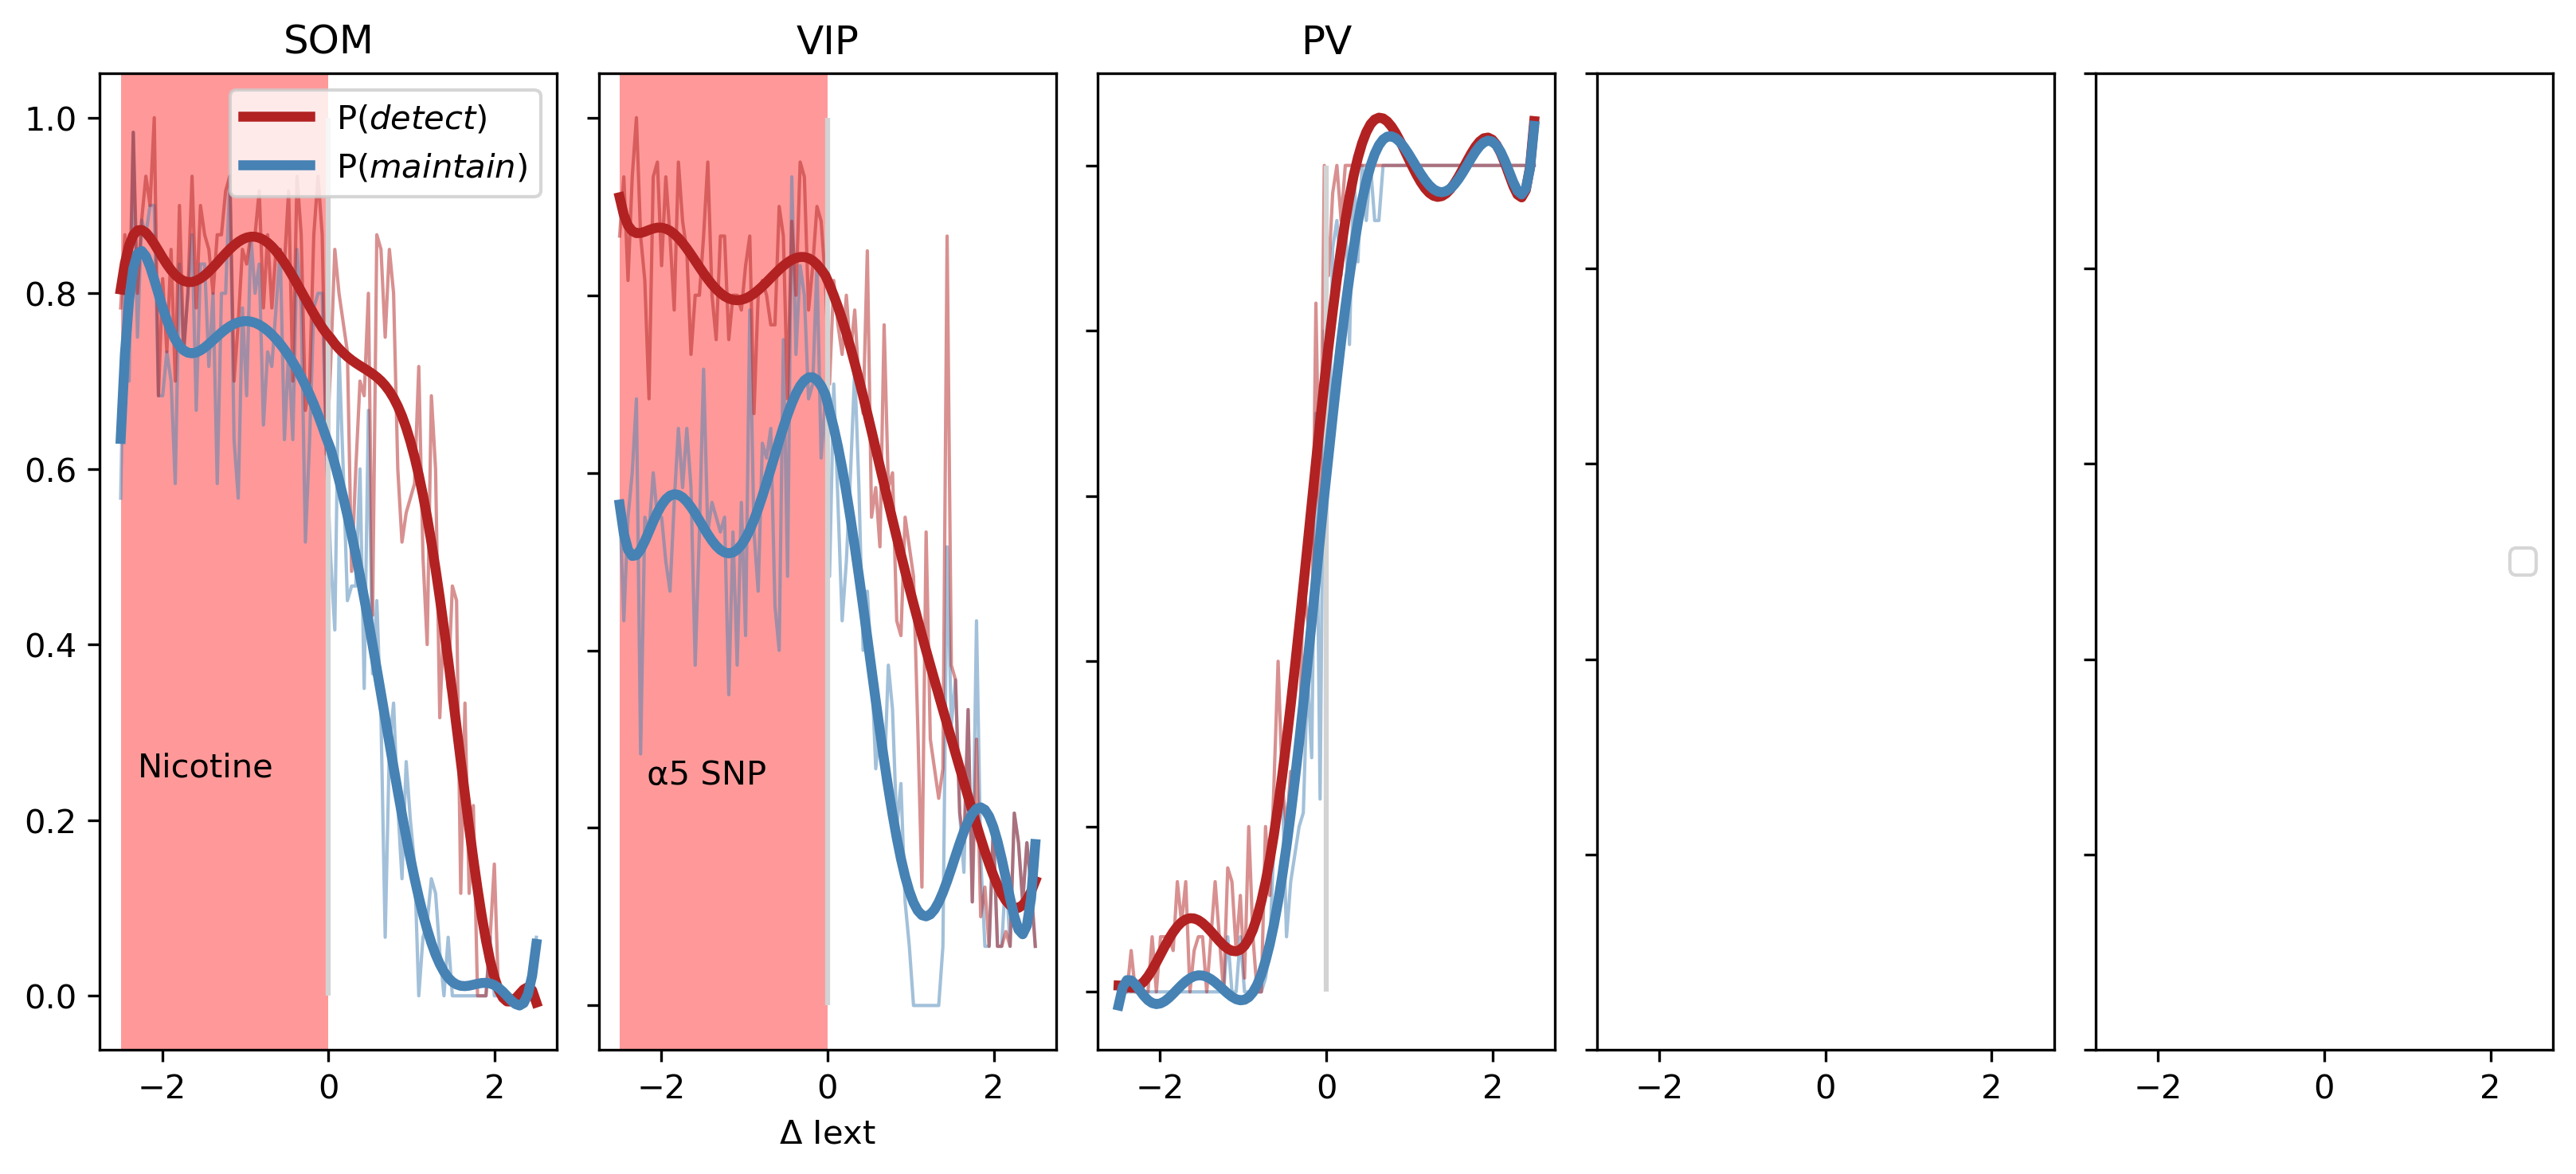

In [51]:
fig, ax = plt.subplots(1, 5, sharex = True, dpi = 300, constrained_layout = True, figsize = ((5/3)*6.4, 4.8))

ax[0].plot(x, load_som_hat_nostp, color = 'firebrick', linewidth = 3, zorder = 2)
ax[0].plot(x, delay_som_hat_nostp, color = 'steelblue', linewidth = 3, zorder = 2)
ax[0].plot(x, delay_som_nostp, color = 'steelblue', linewidth = 1, alpha = 0.5, zorder = 1)
ax[0].plot(x, load_som_nostp, color = 'firebrick', linewidth = 1, alpha = 0.5, zorder = 1)
ax[0].set(title = 'SOM') #xlabel = r'$\Delta$ Iext', 
ax[0].vlines(x= 0, ymin = 0, ymax = 1, color = 'lightgrey')
ax[0].text(-2.3, 0.25, 'Nicotine')
ax[0].axvspan(-2.5, 0, facecolor = 'r', alpha = 0.4)

ax[1].plot(x, load_vip_hat_nostp, color = 'firebrick', linewidth = 3, zorder = 2)
ax[1].plot(x, delay_vip_hat_nostp, color = 'steelblue', linewidth = 3, zorder = 2)
ax[1].plot(x, delay_vip_nostp, color = 'steelblue', alpha = 0.5, linewidth = 1, zorder = 1)
ax[1].plot(x, load_vip_nostp, color = 'firebrick', alpha = 0.5, linewidth = 1, zorder = 1)
ax[1].set(xlabel = r'$\Delta$ Iext', title = 'VIP')
ax[1].vlines(x= 0, ymin = 0, ymax = 1, color = 'lightgrey')
ax[1].text(-2.3, 0.25, ' \u03B15 SNP')
ax[1].axvspan(-2.5, 0, facecolor = 'r', alpha = 0.4)

ax[2].plot(x, load_pv_hat_nostp, color = 'firebrick', linewidth = 3, zorder = 2)
ax[2].plot(x, delay_pv_hat_nostp, color = 'steelblue', linewidth = 3, zorder = 2)
ax[2].plot(x, delay_pv_nostp, color = 'steelblue', alpha = 0.5, linewidth = 1, zorder = 1)
ax[2].plot(x, load_pv_nostp, color = 'firebrick', alpha = 0.5, linewidth = 1, zorder = 1)
ax[2].set(title = 'PV') #xlabel = r'$\Delta$ Iext', 
ax[2].vlines(x= 0, ymin = 0, ymax = 1, color = 'lightgrey')

ax[0].legend(('P($detect$)','P($maintain$)'), loc = 'upper right')

ax[1].tick_params(
    axis='y',         
    which='both',      
    labelleft = False) 

ax[2].tick_params(
    axis='y',         
    which='both',       
    labelleft = False)

ax[3].tick_params(
    axis='y',         
    which='both',       
    labelleft = False)

ax[4].tick_params(
    axis='y',         
    which='both',       
    labelleft = False)
'''
ax[3].plot(x, load_MCI_hat, color = 'orange', linewidth = 3)
ax[3].plot(x, delay_MCI_hat, color = 'blue', linewidth = 3)
ax[3].plot(x, delay_MCI, color = 'lightblue', linewidth = 1)
ax[3].plot(x, load_MCI, color = 'yellow', linewidth = 1)
ax[3].set(xlabel = r'$\Delta$ Iext', title = 'PV & SOM')
ax[3].vlines(x= 0, ymin = 0, ymax = 1, color = 'lightgrey')
ax[3].text(-1.8, 0.4, 'A\u03B2', fontsize = 14)
ax[3].axvspan(-2.5, 0, facecolor = 'r', alpha = 0.1)
'''

plt.legend(('P($detect$)','P($maintain$)'), loc = 'right')

plt.savefig('plots/Fig3/A-NoSTP_DMTS_v2.jpg', dpi = 300)
#plt.tight_layout()
plt.show()

### STP

In [25]:
#x = np.linspace(-2.5,2.5,101)
x = np.linspace(-1.5,1.5,121)
x_MCI = np.linspace(-1.5,1.5,301)
y = delay_som

order = 3
wlength = 21#len(delay_som)

delay_som_hat = savgol_filter(delay_som, wlength, order) # window size 99, polynomial order 9
load_som_hat = savgol_filter(load_som, wlength, order)
delay_vip_hat = savgol_filter(delay_vip, wlength, order)
load_vip_hat = savgol_filter(load_vip, wlength, order)
delay_pv_hat = savgol_filter(delay_pv, wlength, order)
load_pv_hat = savgol_filter(load_pv, wlength, order)
load_MCI_hat = savgol_filter(load_MCI_dis1_amp0_long, wlength, order)  # savgol_filter(load_MCI, wlength, order)     /!\
delay_MCI_hat = savgol_filter(delay_MCI_dis1_amp0_long, wlength, order) # savgol_filter(delay_MCI, wlength, order)   /!\
load_ACh_hat = savgol_filter(load_ACh, wlength, order)
delay_ACh_hat = savgol_filter(delay_ACh, wlength, order)

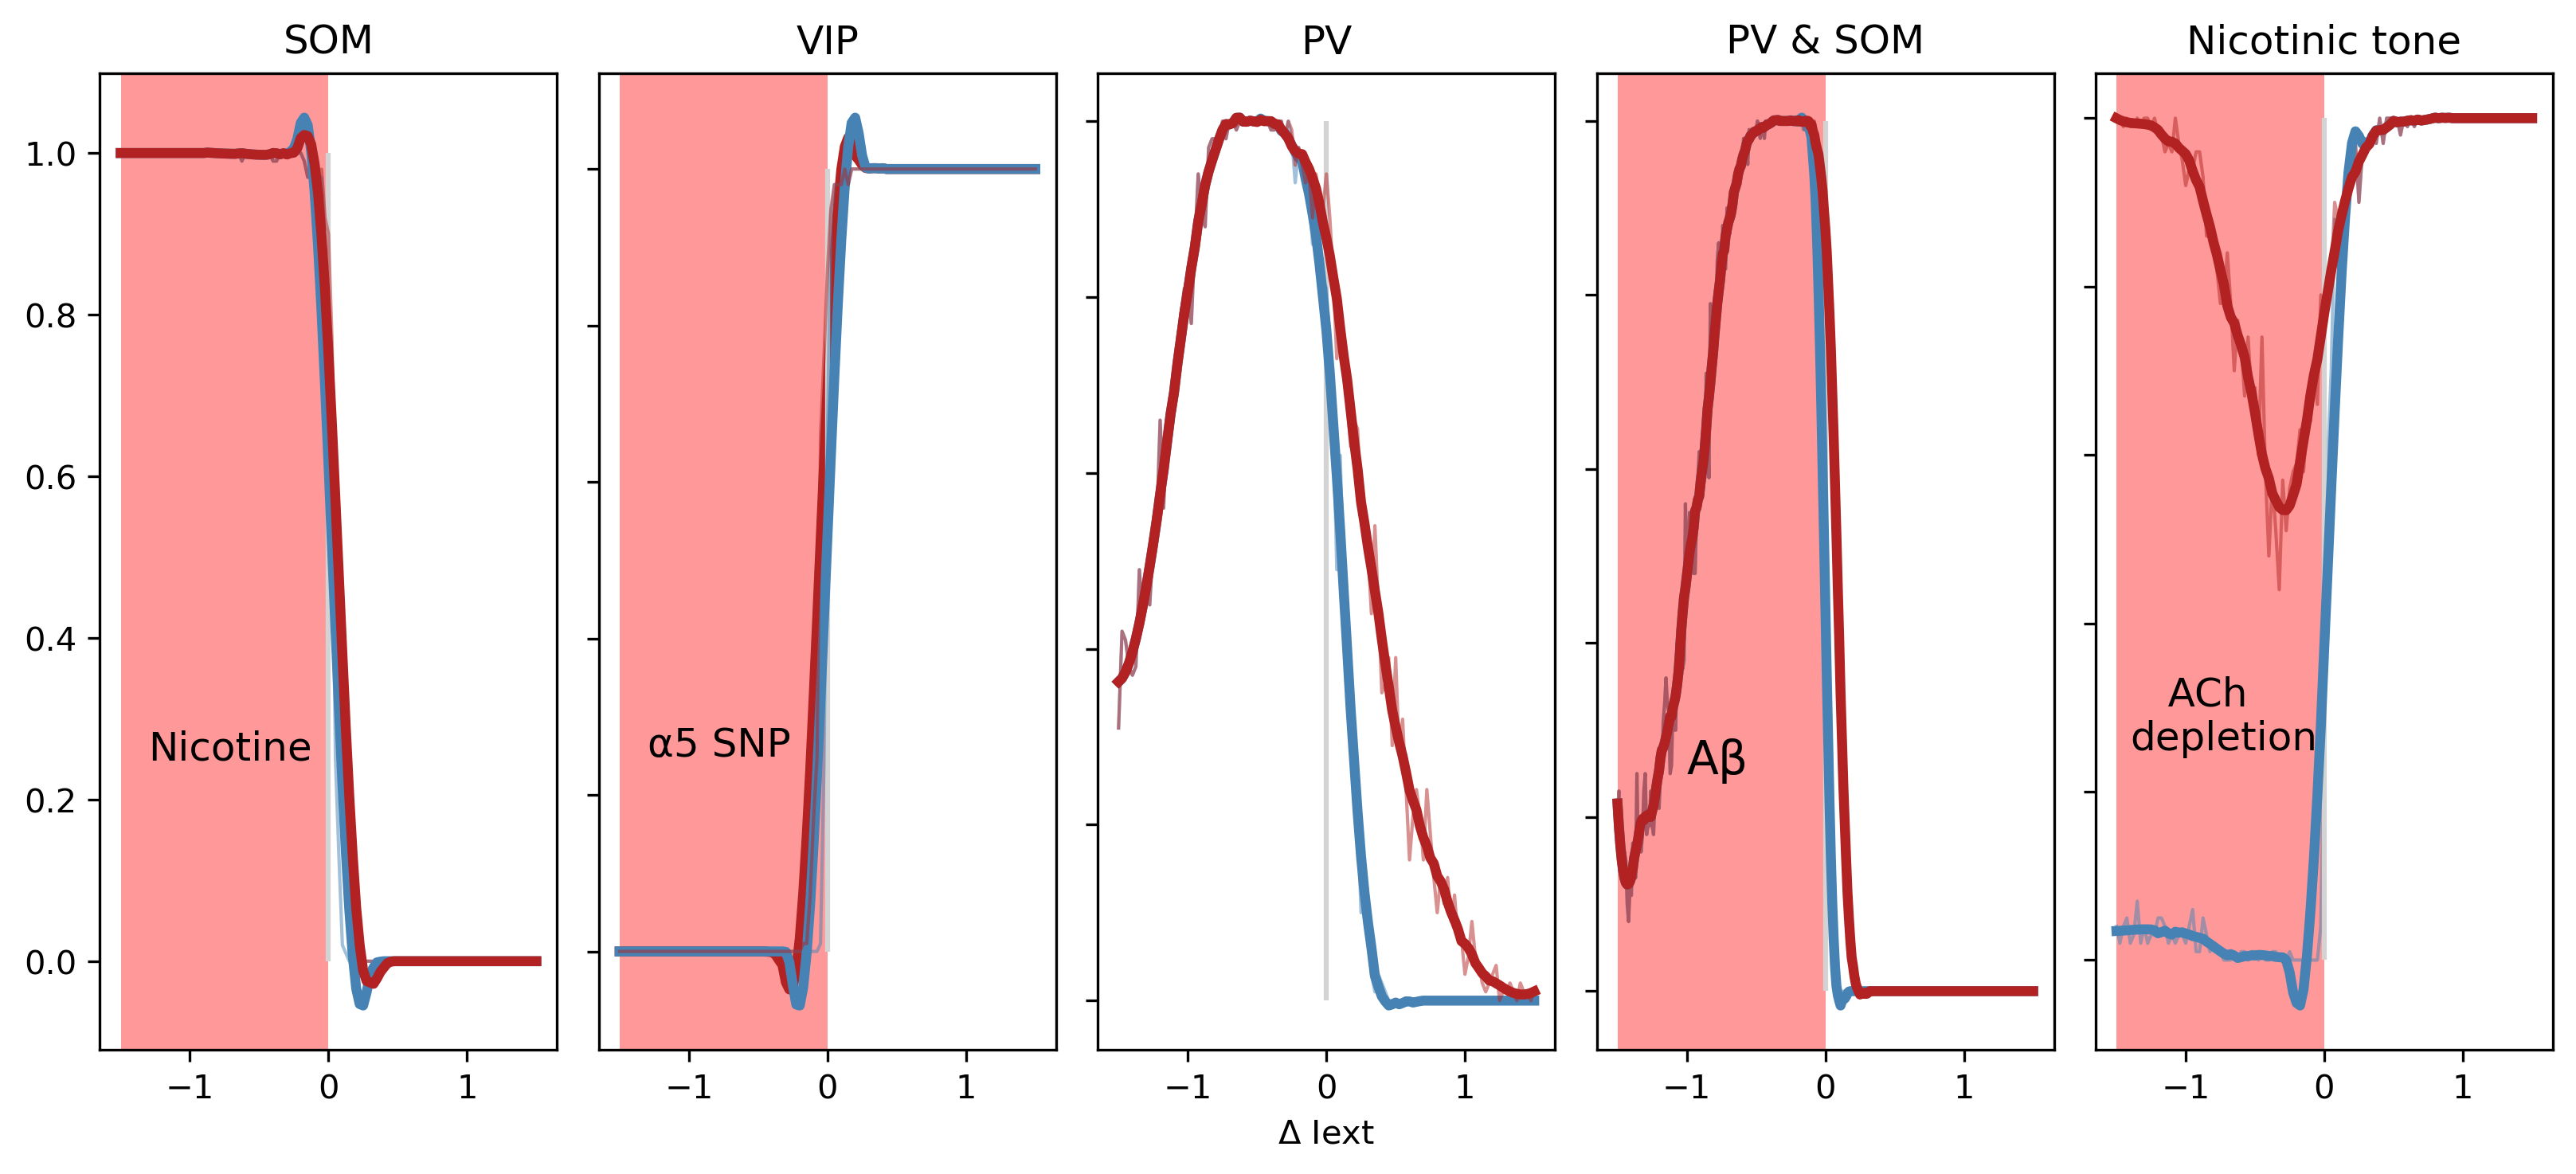

In [27]:
fig, ax = plt.subplots(1, 5, sharex = True, dpi = 300, constrained_layout = True, figsize = ((5/3)*6.4, 4.8)) #figsize = ((5/3)*6.4, 4.8)

smooth = True

if smooth : ax[0].plot(x, load_som_hat, color = 'firebrick', linewidth = 3, zorder = 4)
if smooth : ax[0].plot(x, delay_som_hat, color = 'steelblue', linewidth = 3, zorder = 3)
ax[0].plot(x, delay_som, color = 'steelblue', linewidth = 1 + 1*(not smooth), zorder = 1, alpha = 0.5 + 0.5*(not smooth))
ax[0].plot(x, load_som, color = 'firebrick', linewidth = 1+ 1*(not smooth), zorder = 2, alpha = 0.5 + 0.5*(not smooth))
ax[0].set(title = 'SOM')
ax[0].vlines(x= 0, ymin = 0, ymax = 1, color = 'lightgrey')
ax[0].text(-1.3, 0.25, 'Nicotine', fontsize = 12)
ax[0].axvspan(-1.5, 0, facecolor = 'r', alpha = 0.4)

ax[1].plot(x, delay_vip, color = 'steelblue', linewidth = 1+ 1*(not smooth), zorder = 3, alpha = 0.5 + 0.5*(not smooth))
if smooth : ax[1].plot(x, delay_vip_hat, color = 'steelblue', linewidth = 3, zorder = 2)
ax[1].plot(x, load_vip, color = 'firebrick', linewidth = 1+ 1*(not smooth), zorder = 4, alpha = 0.5 + 0.5*(not smooth))
if smooth : ax[1].plot(x, load_vip_hat, color = 'firebrick', linewidth = 3, zorder = 1)
ax[1].set(title = 'VIP')
ax[1].vlines(x= 0, ymin = 0, ymax = 1, color = 'lightgrey')
ax[1].text(-1.3, 0.25, '\u03B15 SNP', fontsize = 12)
ax[1].axvspan(-1.5, 0, facecolor = 'r', alpha = 0.4)

if smooth : ax[2].plot(x, load_pv_hat, color = 'firebrick', linewidth = 3, zorder = 4)
if smooth : ax[2].plot(x, delay_pv_hat, color = 'steelblue', linewidth = 3, zorder = 2)
ax[2].plot(x, delay_pv, color = 'steelblue', linewidth = 1+ 1*(not smooth), zorder = 3, alpha = 0.5 + 0.5*(not smooth))
ax[2].plot(x, load_pv, color = 'firebrick', linewidth = 1+ 1*(not smooth), zorder = 4, alpha = 0.5 + 0.5*(not smooth))
ax[2].set(xlabel = r'$\Delta$ Iext', title = 'PV')
ax[2].vlines(x= 0, ymin = 0, ymax = 1, color = 'lightgrey')

if smooth : ax[3].plot(x_MCI, load_MCI_hat, color = 'firebrick', linewidth = 3, zorder = 4)
if smooth : ax[3].plot(x_MCI, delay_MCI_hat, color = 'steelblue', linewidth = 3, zorder = 3)
# /!\ Two pop MCI
ax[3].plot(x_MCI, delay_MCI_dis1_amp0_long, color = 'steelblue', linewidth = 1+ 1*(not smooth), zorder = 1, alpha = 0.5 + 0.5*(not smooth))
ax[3].plot(x_MCI, load_MCI_dis1_amp0_long, color = 'firebrick', linewidth = 1+ 1*(not smooth), zorder = 2, alpha = 0.5 + 0.5*(not smooth))
ax[3].set(title = 'PV & SOM')
ax[3].vlines(x= 0, ymin = 0, ymax = 1, color = 'lightgrey')
ax[3].text(-1, 0.25, 'A\u03B2', fontsize = 14)
ax[3].axvspan(-1.5, 0, facecolor = 'r', alpha = 0.4)

if smooth : ax[4].plot(x, load_ACh_hat, color = 'firebrick', linewidth = 3, zorder = 4)
if smooth : ax[4].plot(x, delay_ACh_hat, color = 'steelblue', linewidth = 3, zorder = 3)
ax[4].plot(x, delay_ACh, color = 'steelblue', linewidth = 1+ 1*(not smooth), zorder = 1, alpha = 0.5 + 0.5*(not smooth))
ax[4].plot(x, load_ACh, color = 'firebrick', linewidth = 1+ 1*(not smooth), zorder = 2, alpha = 0.5 + 0.5*(not smooth))
ax[4].set(title = 'Nicotinic tone')
ax[4].vlines(x= 0, ymin = 0, ymax = 1, color = 'lightgrey')
ax[4].text(-1.4, 0.25, '   ACh\ndepletion', fontsize = 12)
ax[4].axvspan(-1.5, 0, facecolor = 'r', alpha = 0.4)

for i in (1,2,3,4) : ax[i].tick_params(
    axis='y',         
    which='both',      
    labelleft = False) 

#ax[0].legend(('P($detect$)','P($maintain$)'), loc = 'lower left')

#fig.tight_layout()

#plt.savefig('plots/Fig3/B-STP_DMTS_v3.jpg', dpi = 300)

plt.show()

## Figure 4 - Distractors

### Distractor amplitude

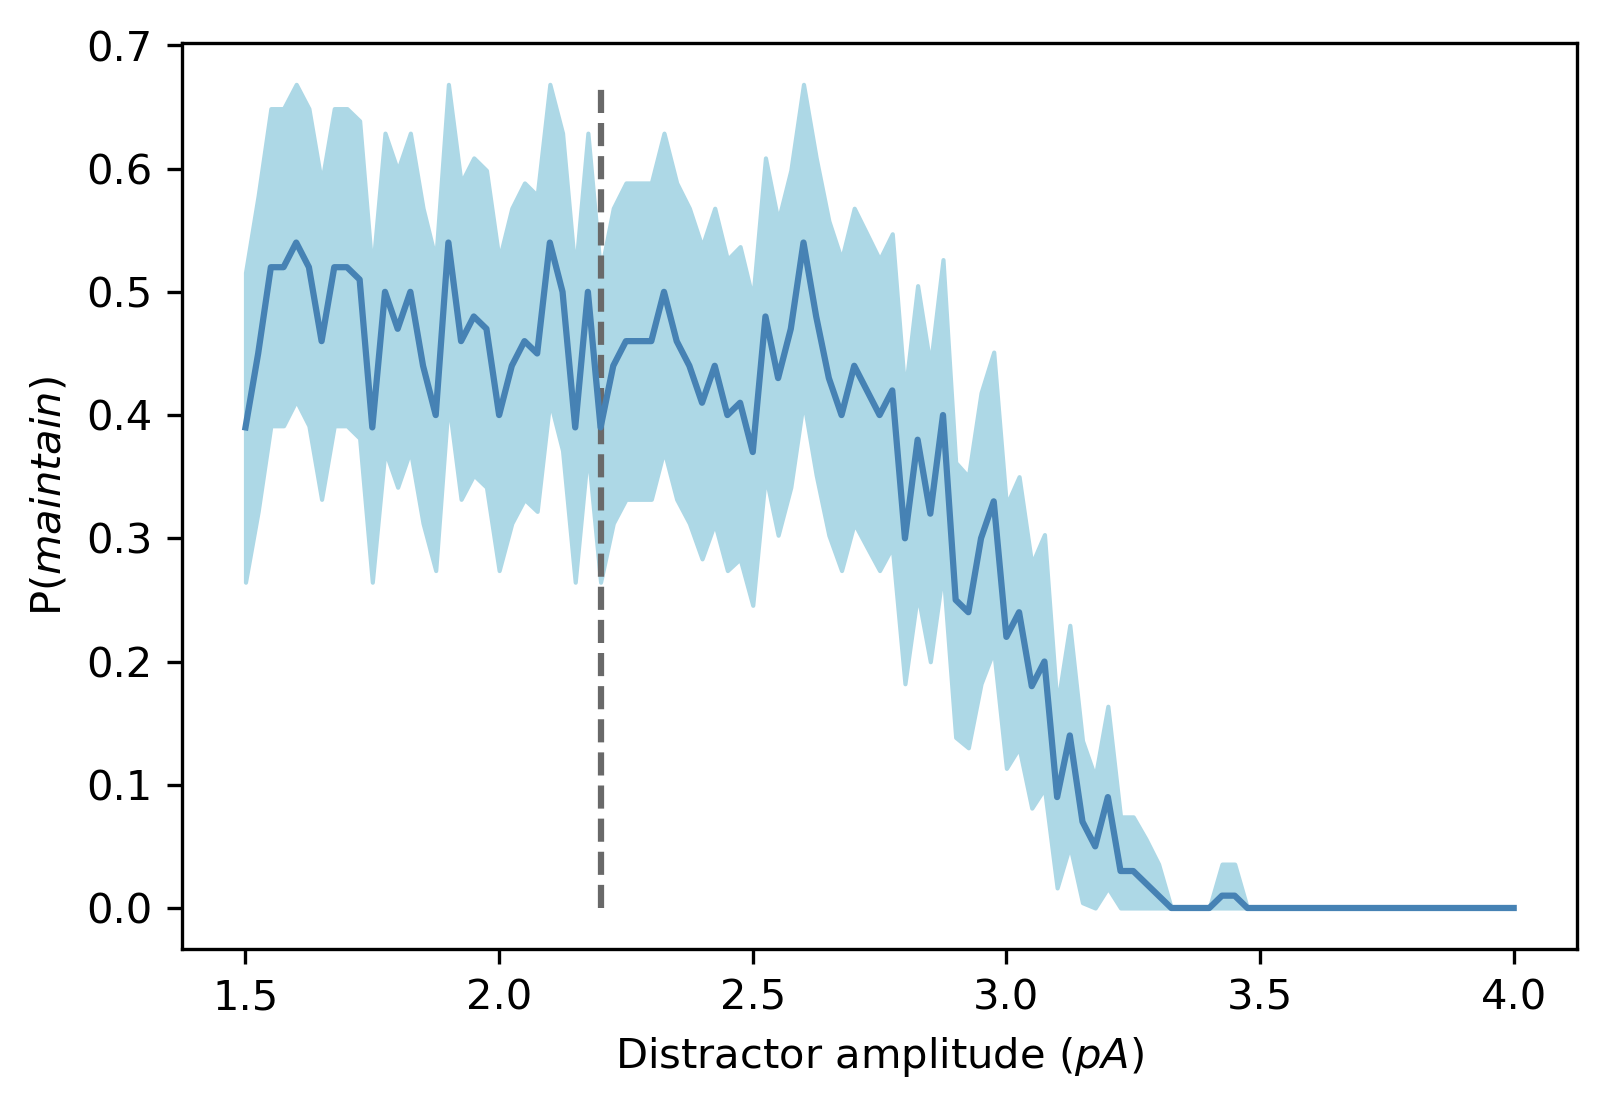

In [127]:
x = [1.5 + 0.025*i for i in range(101)]
error = proportion_confint(dist_amp_pdr1*100, 100, 0.01)

plt.figure(dpi = 300)
plt.plot(x, dist_amp_pdr1, color = 'steelblue')
plt.vlines(x = 2.2, ymin = 0, ymax = max(error[1]), linestyle = '--', color = 'dimgrey')
plt.fill_between(x, error[0], error[1], alpha = 1, color = 'lightblue')
plt.ylabel('P($maintain$)')
plt.xlabel('Distractor amplitude ($pA$)')
#plt.savefig('plots/Fig4/E-dist_amplitude.jpg', dpi = 300)
#plt.hlines(y = 0.6, xmin = 0, xmax = 100)
#plt.vlines(x = 81, ymin =0, ymax =1)  # Index 81 corresponds to dist_amp = 3.025

### Distractor & IN Iext

#### Two columns without distractor

In [10]:
#x = np.linspace(-1.5,1.5,121)
x = np.linspace(-1, 1, 201)
y = delay_som

wlen = 31
order = 6

delay_som_hat_dis1_amp0 = savgol_filter(delay_som_dis1_amp0, wlen, order) # window size 99, polynomial order 9
load_som_hat_dis1_amp0 = savgol_filter(load_som_dis1_amp0, wlen, order)
delay_vip_hat_dis1_amp0 = savgol_filter(delay_vip_dis1_amp0, wlen, order)
load_vip_hat_dis1_amp0 = savgol_filter(load_vip_dis1_amp0, wlen, order)
delay_pv_hat_dis1_amp0 = savgol_filter(delay_pv_dis1_amp0, wlen, order)
load_pv_hat_dis1_amp0 = savgol_filter(load_pv_dis1_amp0, wlen, order)
load_MCI_hat_dis1_amp0 = savgol_filter(load_MCI_dis1_amp0, wlen, order)
delay_MCI_hat_dis1_amp0 = savgol_filter(delay_MCI_dis1_amp0, wlen, order)
load_ACh_hat_dis1_amp0 = savgol_filter(load_ACh_dis1_amp0, 99, 9)
delay_ACh_hat_dis1_amp0 = savgol_filter(delay_ACh_dis1_amp0, 99, 9)

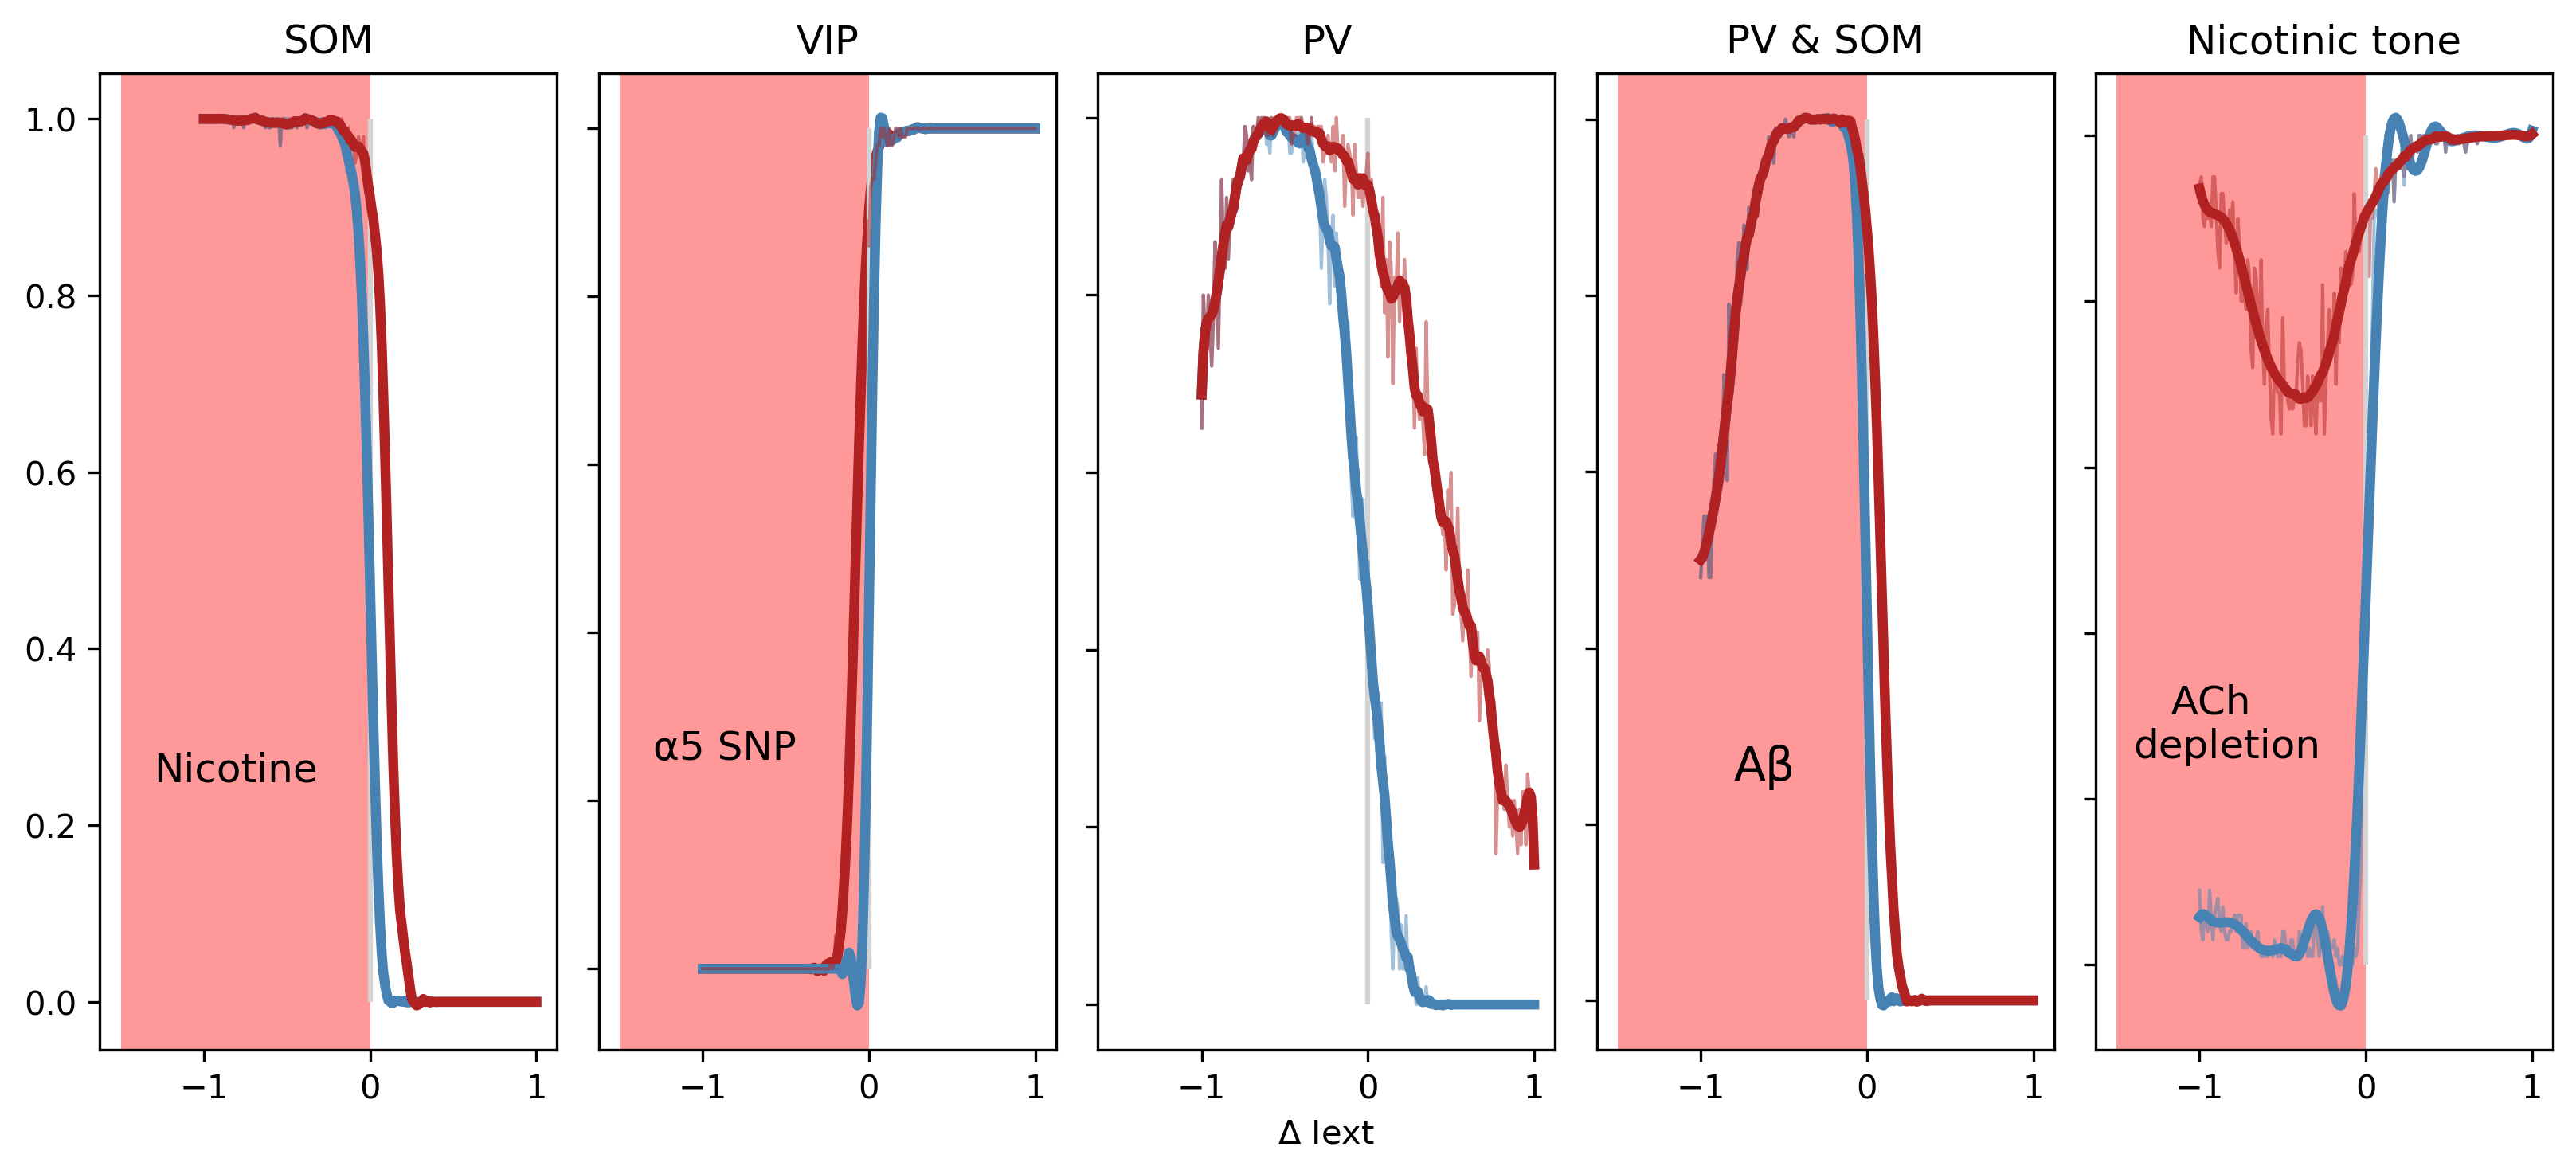

In [16]:
fig, ax = plt.subplots(1, 5, sharex = True, dpi = 300, constrained_layout = True, figsize = ((5/3)*6.4, 4.8)) #figsize = ((5/3)*6.4, 4.8)

smooth = True

if smooth : ax[0].plot(x, load_som_hat_dis1_amp0, color = 'firebrick', linewidth = 3, zorder = 4)
if smooth : ax[0].plot(x, delay_som_hat_dis1_amp0, color = 'steelblue', linewidth = 3, zorder = 3)
ax[0].plot(x, delay_som_dis1_amp0, color = 'steelblue', linewidth = 1 + 1*(not smooth), zorder = 2, alpha = 0.5 + 0.5*(not smooth))
ax[0].plot(x, load_som_dis1_amp0, color = 'firebrick', linewidth = 1+ 1*(not smooth), zorder = 1, alpha = 0.5 + 0.5*(not smooth))
ax[0].set(title = 'SOM')
ax[0].vlines(x= 0, ymin = 0, ymax = 1, color = 'lightgrey')
ax[0].text(-1.3, 0.25, 'Nicotine', fontsize = 12)
ax[0].axvspan(-1.5, 0, facecolor = 'r', alpha = 0.4)

ax[1].plot(x, delay_vip_dis1_amp0, color = 'steelblue', linewidth = 1+ 1*(not smooth), zorder = 3, alpha = 0.5 + 0.5*(not smooth))
if smooth : ax[1].plot(x, delay_vip_hat_dis1_amp0, color = 'steelblue', linewidth = 3, zorder = 2)
ax[1].plot(x, load_vip_dis1_amp0, color = 'firebrick', linewidth = 1+ 1*(not smooth), zorder = 4, alpha = 0.5 + 0.5*(not smooth))
if smooth : ax[1].plot(x, load_vip_hat_dis1_amp0, color = 'firebrick', linewidth = 3, zorder = 1)
ax[1].set(title = 'VIP')
ax[1].vlines(x= 0, ymin = 0, ymax = 1, color = 'lightgrey')
ax[1].text(-1.3, 0.25, '\u03B15 SNP', fontsize = 12)
ax[1].axvspan(-1.5, 0, facecolor = 'r', alpha = 0.4)

if smooth : ax[2].plot(x, load_pv_hat_dis1_amp0, color = 'firebrick', linewidth = 3, zorder = 4)
if smooth : ax[2].plot(x, delay_pv_hat_dis1_amp0, color = 'steelblue', linewidth = 3, zorder = 2)
ax[2].plot(x, delay_pv_dis1_amp0, color = 'steelblue', linewidth = 1+ 1*(not smooth), zorder = 3, alpha = 0.5 + 0.5*(not smooth))
ax[2].plot(x, load_pv_dis1_amp0, color = 'firebrick', linewidth = 1+ 1*(not smooth), zorder = 4, alpha = 0.5 + 0.5*(not smooth))
ax[2].set(xlabel = r'$\Delta$ Iext', title = 'PV')
ax[2].vlines(x= 0, ymin = 0, ymax = 1, color = 'lightgrey')

if smooth : ax[3].plot(x, load_MCI_hat_dis1_amp0, color = 'firebrick', linewidth = 3, zorder = 4)
if smooth : ax[3].plot(x, delay_MCI_hat_dis1_amp0, color = 'steelblue', linewidth = 3, zorder = 3)
ax[3].plot(x, delay_MCI_dis1_amp0, color = 'steelblue', linewidth = 1+ 1*(not smooth), zorder = 2, alpha = 0.5 + 0.5*(not smooth))
ax[3].plot(x, load_MCI_dis1_amp0, color = 'firebrick', linewidth = 1+ 1*(not smooth), zorder = 1, alpha = 0.5 + 0.5*(not smooth))
ax[3].set(title = 'PV & SOM')
ax[3].vlines(x= 0, ymin = 0, ymax = 1, color = 'lightgrey')
ax[3].text(-0.8, 0.25, 'A\u03B2', fontsize = 14)
ax[3].axvspan(-1.5, 0, facecolor = 'r', alpha = 0.4)

if smooth : ax[4].plot(x, load_ACh_hat_dis1_amp0, color = 'firebrick', linewidth = 3, zorder = 4)
if smooth : ax[4].plot(x, delay_ACh_hat_dis1_amp0, color = 'steelblue', linewidth = 3, zorder = 3)
ax[4].plot(x, delay_ACh_dis1_amp0, color = 'steelblue', linewidth = 1+ 1*(not smooth), zorder = 2, alpha = 0.5 + 0.5*(not smooth))
ax[4].plot(x, load_ACh_dis1_amp0, color = 'firebrick', linewidth = 1+ 1*(not smooth), zorder = 1, alpha = 0.5 + 0.5*(not smooth))
ax[4].set(title = 'Nicotinic tone')
ax[4].vlines(x= 0, ymin = 0, ymax = 1, color = 'lightgrey')
ax[4].text(-1.4, 0.25, '   ACh\ndepletion', fontsize = 12)
ax[4].axvspan(-1.5, 0, facecolor = 'r', alpha = 0.4)

for i in range(1,5) : ax[i].tick_params(
    axis='y',         
    which='both',      
    labelleft = False) 

#ax[0].legend(('P($detect$)','P($maintain$)'), loc = 'lower left')

#fig.tight_layout()

plt.savefig('plots/Fig4/B-distracted_dmts_v2.jpg', dpi = 300)

plt.show()

#### With distractor

In [17]:
#x = np.linspace(-1.5,1.5,121)
x = np.linspace(-1.5, 1.5, 301)
y = delay_som

wlen = 31
order = 6

delay_som_hat_dis1 = savgol_filter(delay_som_dis1, wlen, order) # window size 99, polynomial order 9
load_som_hat_dis1 = savgol_filter(load_som_dis1, wlen, order)
delay_vip_hat_dis1 = savgol_filter(delay_vip_dis1, wlen, order)
load_vip_hat_dis1 = savgol_filter(load_vip_dis1, wlen, order)
delay_pv_hat_dis1 = savgol_filter(delay_pv_dis1, wlen, order)
load_pv_hat_dis1 = savgol_filter(load_pv_dis1, wlen, order)
load_MCI_hat_dis1 = savgol_filter(load_MCI_dis1, wlen, order)
delay_MCI_hat_dis1 = savgol_filter(delay_MCI_dis1, wlen, order)
load_ACh_hat_dis1= savgol_filter(load_ACh_dis1, 99, 9)
delay_ACh_hat_dis1 = savgol_filter(delay_ACh_dis1, 99, 9)

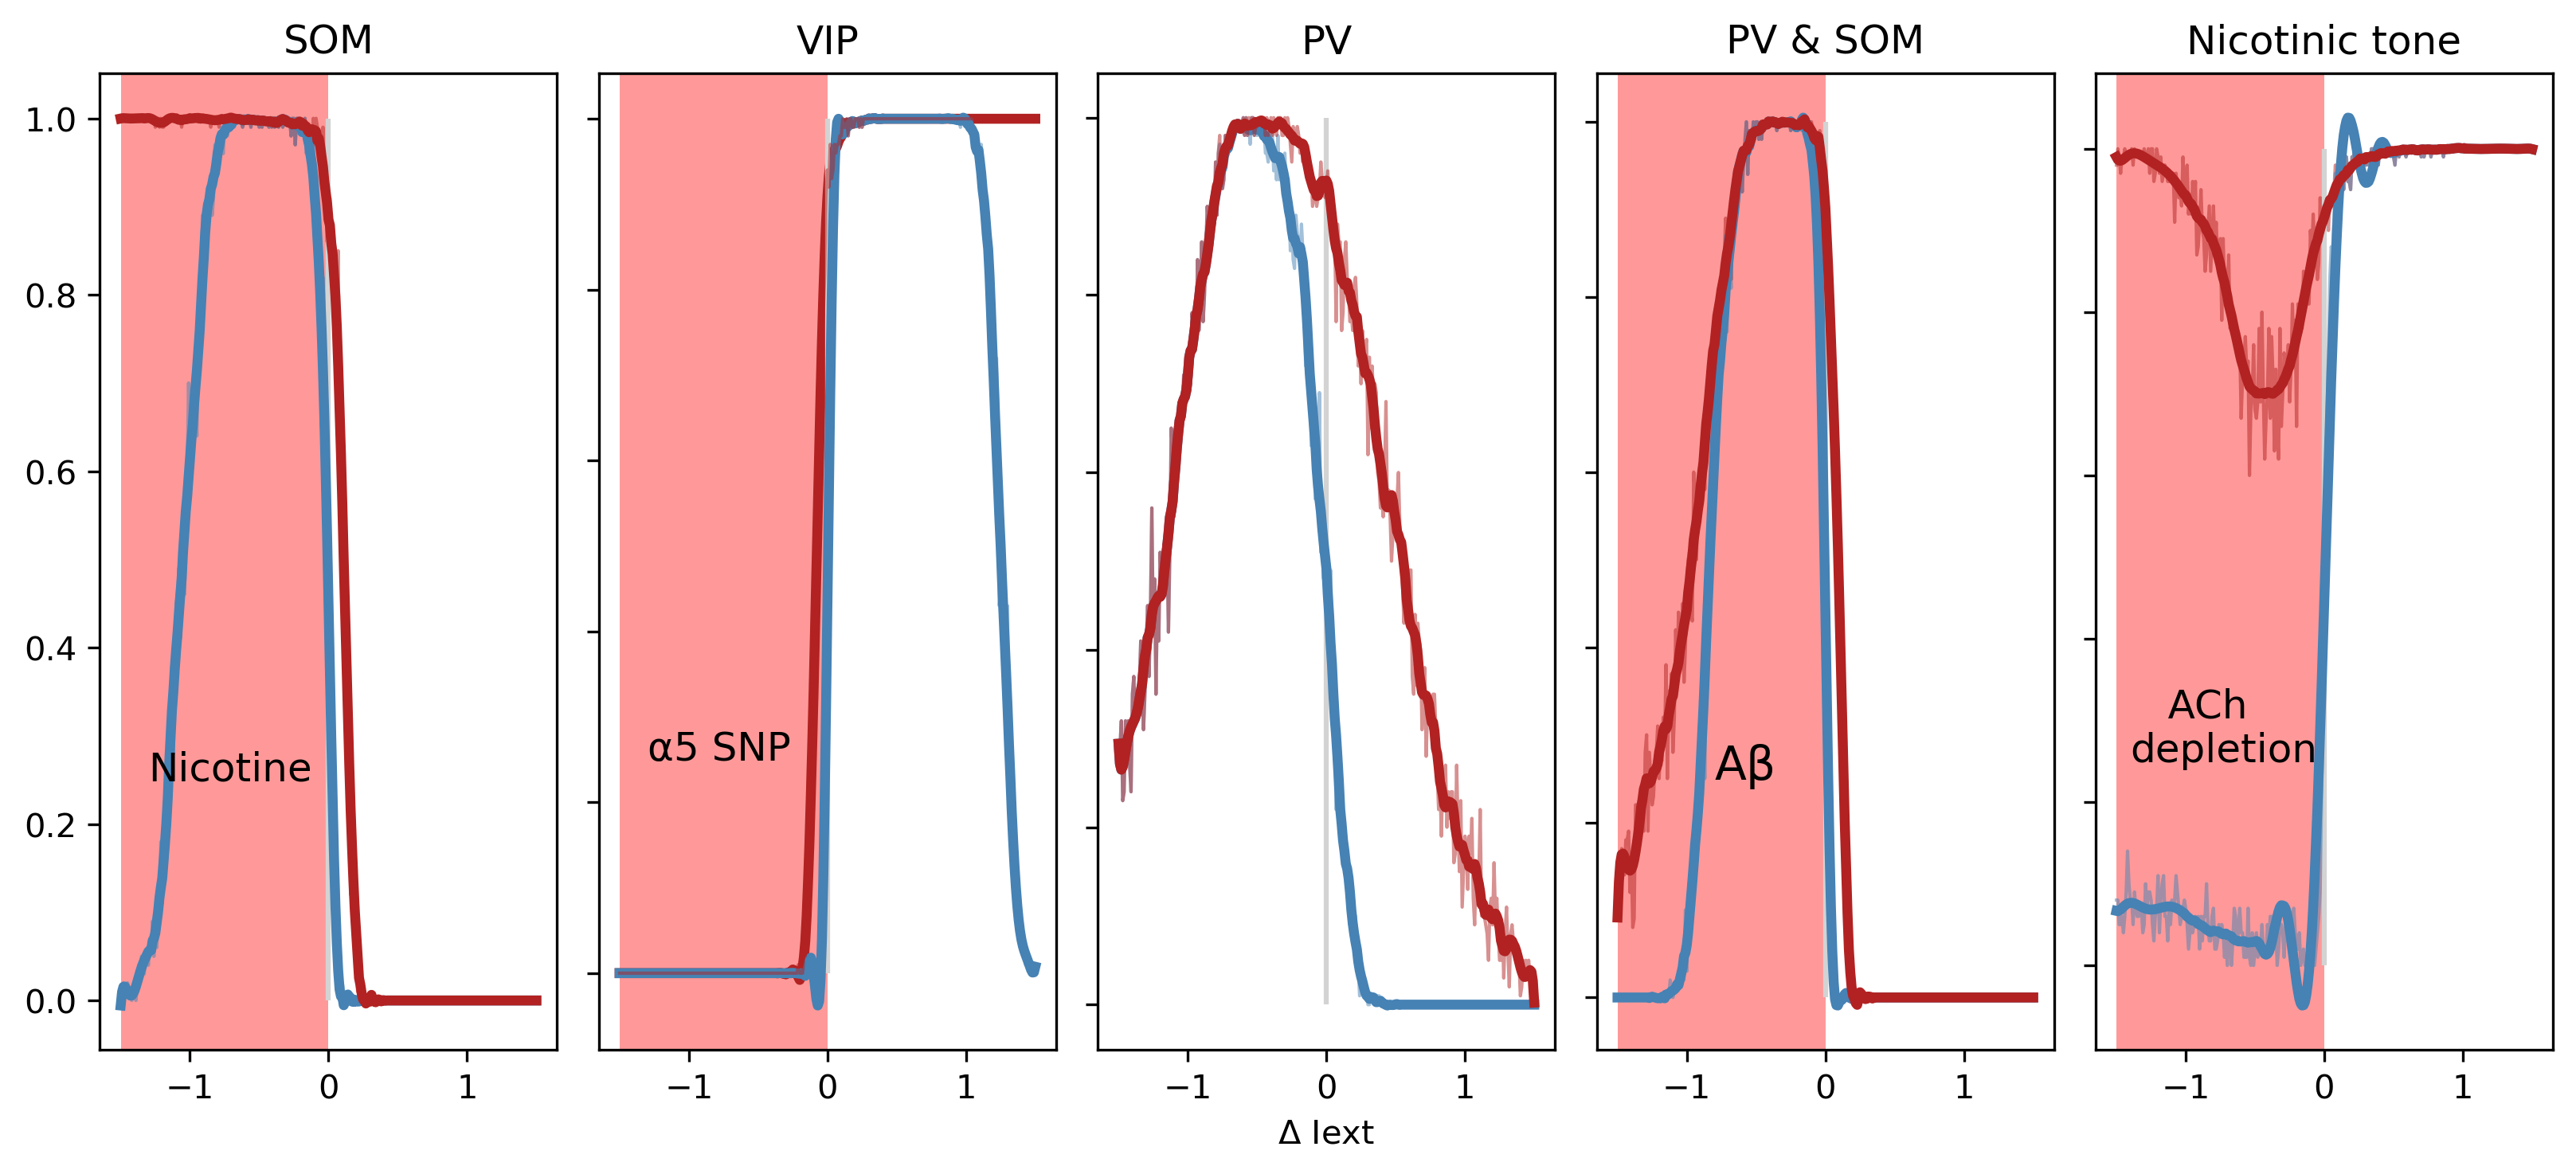

In [18]:
fig, ax = plt.subplots(1, 5, sharex = True, dpi = 300, constrained_layout = True, figsize = ((5/3)*6.4, 4.8)) #figsize = ((5/3)*6.4, 4.8)

smooth = True

if smooth : ax[0].plot(x, load_som_hat_dis1, color = 'firebrick', linewidth = 3, zorder = 4)
if smooth : ax[0].plot(x, delay_som_hat_dis1, color = 'steelblue', linewidth = 3, zorder = 3)
ax[0].plot(x, delay_som_dis1, color = 'steelblue', linewidth = 1 + 1*(not smooth), zorder = 2, alpha = 0.5 + 0.5*(not smooth))
ax[0].plot(x, load_som_dis1, color = 'firebrick', linewidth = 1+ 1*(not smooth), zorder = 1, alpha = 0.5 + 0.5*(not smooth))
ax[0].set(title = 'SOM')
ax[0].vlines(x= 0, ymin = 0, ymax = 1, color = 'lightgrey')
ax[0].text(-1.3, 0.25, 'Nicotine', fontsize = 12)
ax[0].axvspan(-1.5, 0, facecolor = 'r', alpha = 0.4)

ax[1].plot(x, delay_vip_dis1, color = 'steelblue', linewidth = 1+ 1*(not smooth), zorder = 3, alpha = 0.5 + 0.5*(not smooth))
if smooth : ax[1].plot(x, delay_vip_hat_dis1, color = 'steelblue', linewidth = 3, zorder = 2)
ax[1].plot(x, load_vip_dis1, color = 'firebrick', linewidth = 1+ 1*(not smooth), zorder = 4, alpha = 0.5 + 0.5*(not smooth))
if smooth : ax[1].plot(x, load_vip_hat_dis1, color = 'firebrick', linewidth = 3, zorder = 1)
ax[1].set(title = 'VIP')
ax[1].vlines(x= 0, ymin = 0, ymax = 1, color = 'lightgrey')
ax[1].text(-1.3, 0.25, '\u03B15 SNP', fontsize = 12)
ax[1].axvspan(-1.5, 0, facecolor = 'r', alpha = 0.4)

if smooth : ax[2].plot(x, load_pv_hat_dis1, color = 'firebrick', linewidth = 3, zorder = 4)
if smooth : ax[2].plot(x, delay_pv_hat_dis1, color = 'steelblue', linewidth = 3, zorder = 2)
ax[2].plot(x, delay_pv_dis1, color = 'steelblue', linewidth = 1+ 1*(not smooth), zorder = 3, alpha = 0.5 + 0.5*(not smooth))
ax[2].plot(x, load_pv_dis1, color = 'firebrick', linewidth = 1+ 1*(not smooth), zorder = 4, alpha = 0.5 + 0.5*(not smooth))
ax[2].set(xlabel = r'$\Delta$ Iext', title = 'PV')
ax[2].vlines(x= 0, ymin = 0, ymax = 1, color = 'lightgrey')

if smooth : ax[3].plot(x, load_MCI_hat_dis1, color = 'firebrick', linewidth = 3, zorder = 4)
if smooth : ax[3].plot(x, delay_MCI_hat_dis1, color = 'steelblue', linewidth = 3, zorder = 3)
ax[3].plot(x, delay_MCI_dis1, color = 'steelblue', linewidth = 1+ 1*(not smooth), zorder = 2, alpha = 0.5 + 0.5*(not smooth))
ax[3].plot(x, load_MCI_dis1, color = 'firebrick', linewidth = 1+ 1*(not smooth), zorder = 1, alpha = 0.5 + 0.5*(not smooth))
ax[3].set(title = 'PV & SOM')
ax[3].vlines(x= 0, ymin = 0, ymax = 1, color = 'lightgrey')
ax[3].text(-0.8, 0.25, 'A\u03B2', fontsize = 14)
ax[3].axvspan(-1.5, 0, facecolor = 'r', alpha = 0.4)

if smooth : ax[4].plot(x, load_ACh_hat_dis1, color = 'firebrick', linewidth = 3, zorder = 4)
if smooth : ax[4].plot(x, delay_ACh_hat_dis1, color = 'steelblue', linewidth = 3, zorder = 3)
ax[4].plot(x, delay_ACh_dis1, color = 'steelblue', linewidth = 1+ 1*(not smooth), zorder = 2, alpha = 0.5 + 0.5*(not smooth))
ax[4].plot(x, load_ACh_dis1, color = 'firebrick', linewidth = 1+ 1*(not smooth), zorder = 1, alpha = 0.5 + 0.5*(not smooth))
ax[4].set(title = 'Nicotinic tone')
ax[4].vlines(x= 0, ymin = 0, ymax = 1, color = 'lightgrey')
ax[4].text(-1.4, 0.25, '   ACh\ndepletion', fontsize = 12)
ax[4].axvspan(-1.5, 0, facecolor = 'r', alpha = 0.4)

for i in range(1,5) : ax[i].tick_params(
    axis='y',         
    which='both',      
    labelleft = False) 

#ax[0].legend(('P($detect$)','P($maintain$)'), loc = 'lower left')

#fig.tight_layout()

plt.savefig('plots/Fig4/B-distracted_dmts_v2.jpg', dpi = 300)

plt.show()

### Sensitivity to distractors healthy / alpha5 SNP

Text(0, 0.5, "Distractor's relative effect")

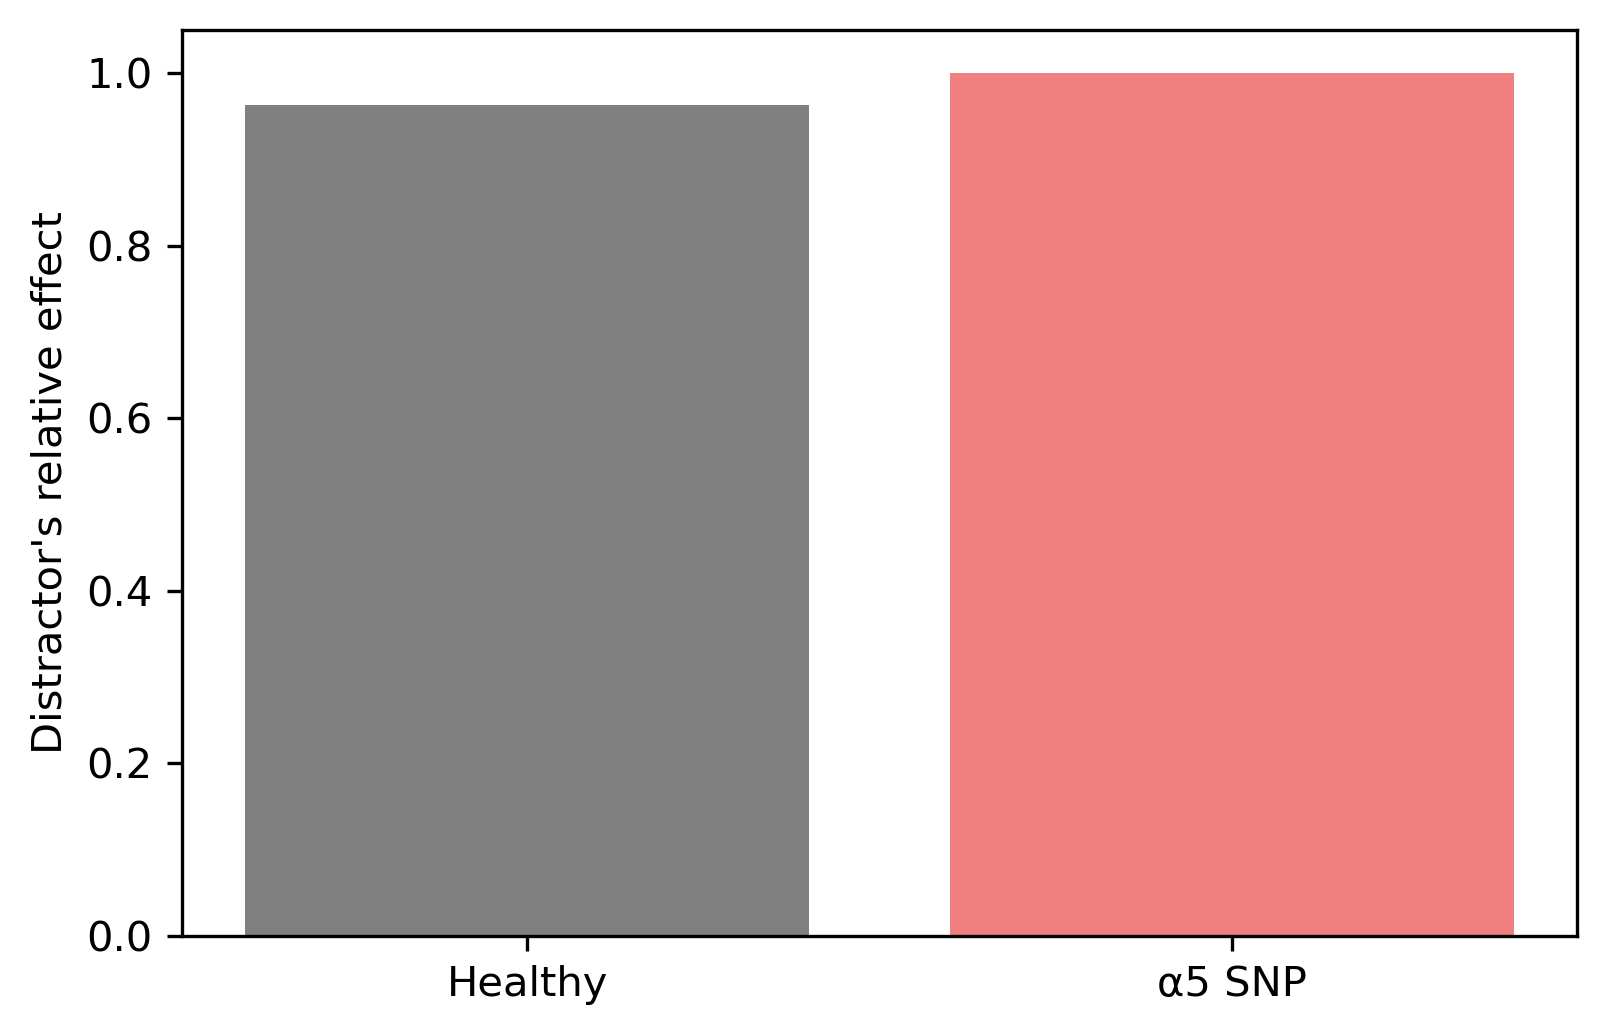

In [25]:
a5snp_current = 0.25
sensitivity_healthy = (1-delay_vip_dis1[150]) / (1- delay_vip_dis1_amp0[100])
sensitivity_a5snp = (1-delay_vip_dis1[50]) / (1- delay_vip_dis1_amp0[0])

#healthy_err = proportion_confint(sensitivity_healthy*100, 100, 0.05) 
#a5snp_err = proportion_confint(sensitivity_a5snp*100, 100, 0.05)

plt.figure(dpi=300)
plt.bar((0,1), height = (sensitivity_healthy, sensitivity_a5snp), tick_label = ('Healthy', '\u03B15 SNP'), color = ('grey', 'lightcoral'))#, yerr = (healthy_err, a5snp_err))
plt.ylabel('Distractor\'s relative effect')

#plt.savefig('F-Distractor_effect_healthy_a5snp.png', dpi = 300)

NameError: name 'error' is not defined

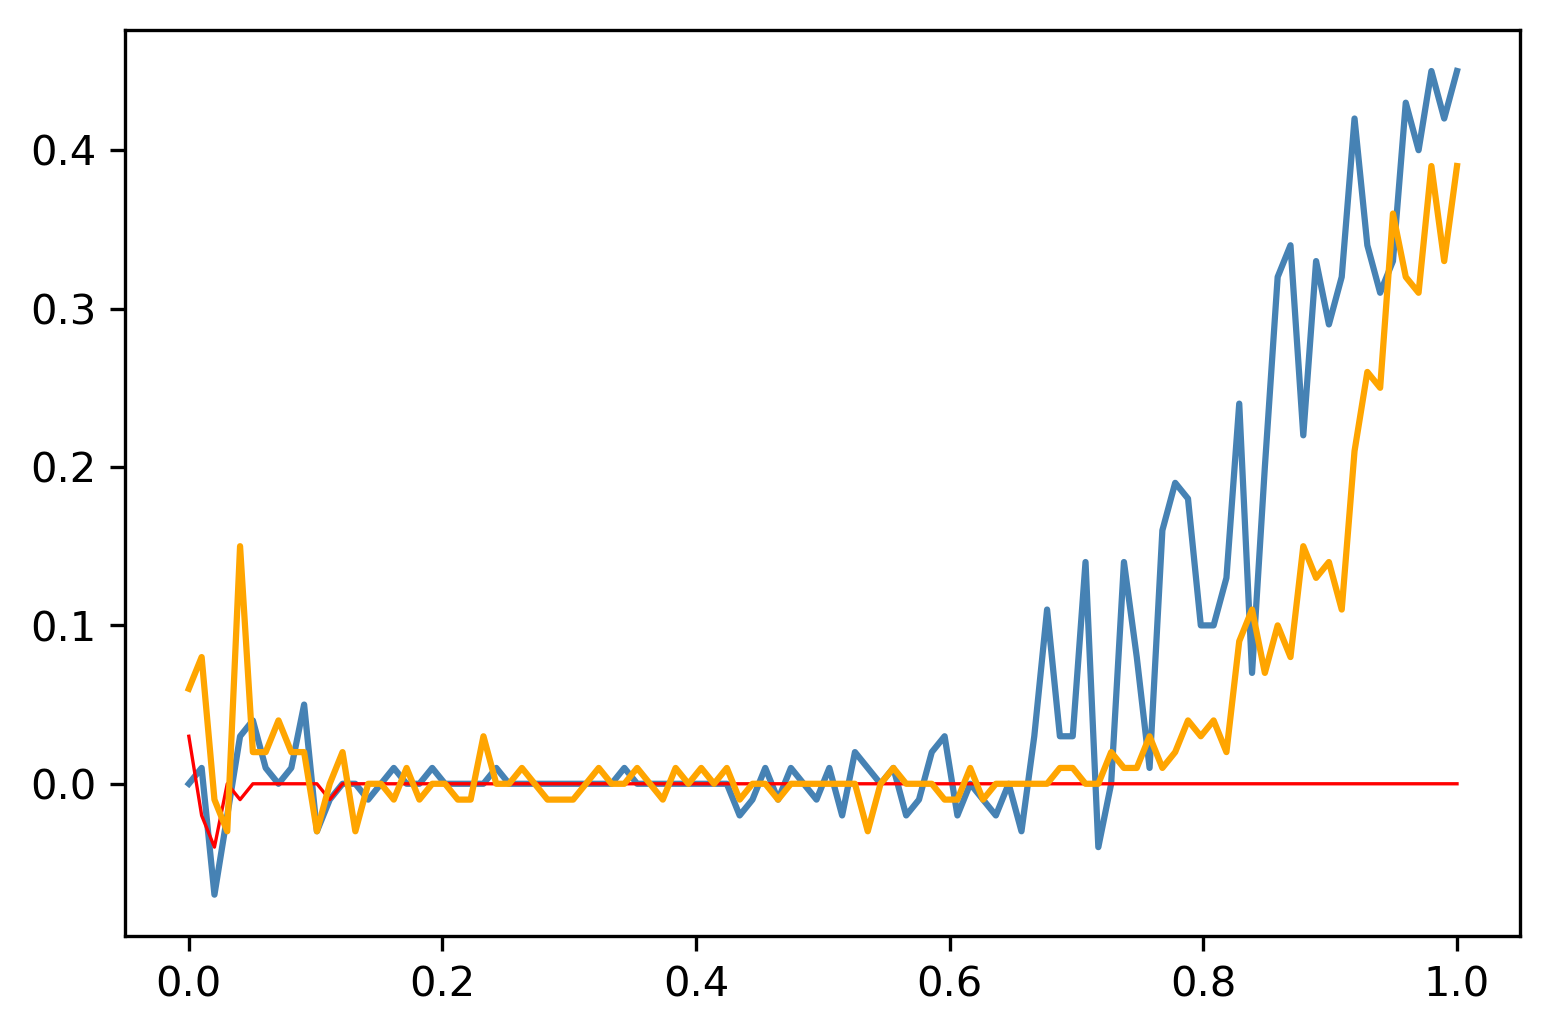

In [6]:
def confint_here(noDist, dist, n = 100, Zalpha = 1.96): # Gaussian approximation https://www.statisticshowto.com/binomial-confidence-interval/
    lower = np.array([p1-p2 - Zalpha*np.sqrt((p1*(1-p1)+p2*(1-p2))/n) for (p1,p2) in zip(noDist, dist)])
    upper = np.array([p1-p2 + Zalpha*np.sqrt((p1*(1-p1)+p2*(1-p2))/n) for (p1,p2) in zip(noDist, dist)])
    return np.vstack((lower, upper))
    
plt.figure(dpi = 300)

se_a5snp = (delay_vip_dis1_amp0[:100] - delay_vip_dis1[50:150])[::-1]
se_nicotine = (delay_som_dis1_amp0[:100] - delay_som_dis1[50:150])[::-1]
se_MCI = (delay_MCI_dis1_amp0[:100] - delay_MCI_dis1[50:150])[::-1]
#se_ACh = (delay_ACh_dis1_amp0[:100] - delay_ACh_dis1[50:150])[::-1]

error_a5snp = confint_here(delay_vip_dis1_amp0[:100], delay_vip_dis1[50:150])               #proportion_confint(se_a5snp*100, 100, 0.05)
error_nicotine = confint_here(delay_som_dis1_amp0[:100], delay_som_dis1[50:150])            # proportion_confint(se_nicotine*100, 100, 0.05)
error_MCI = confint_here(delay_MCI_dis1_amp0[:100], delay_MCI_dis1[50:150])                #proportion_confint(se_MCI*100, 100, 0.05)
#error_ACh = proportion_confint(se_ACh*100, 100, 0.05)

x = np.linspace(0,1,100)

plt.plot(x, se_a5snp, color = 'red', zorder = 4, linewidth = 0.8)
plt.plot(x, se_nicotine, color = 'orange', zorder = 5)
plt.plot(x, se_MCI, color = 'steelblue', zorder = 3)
#plt.plot(x, se_ACh)

plt.fill_between(x, error[0][::-1], error[1][::-1], alpha = 1, color = 'red', zorder = 1)
plt.fill_between(x, error_nicotine[0][::-1], error_nicotine[1][::-1], alpha = 1, color = 'wheat', zorder = 2)
plt.fill_between(x, error_MCI[0][::-1], error_MCI[1][::-1], alpha = 1, color = 'lightblue', zorder = 0)
#plt.fill_between(x, error_ACh[0], error_ACh[1], alpha = 0.15, color = 'yellow')

plt.legend(('\u03B15 SNP', 'Nicotine', 'MCI'), loc = 'upper left')
plt.ylabel('Sensitivity to distraction')
plt.xlabel('Current\'s relative reduction ($pA$)')

#plt.savefig('plots/Fig4/F-Distractor_effect_healthy_a5snp_v2.jpg', dpi = 300)

## Figure 5 - Theories of phasic neuromodulation

### Different hypothesis

In [11]:
nicTrans_buffer = nicTrans
nicTrans_kam_buffer = nicTrans_kam
nicTrans_norm_buffer = nicTrans_norm
nicTrans_kam_norm_buffer = nicTrans_kam_norm

In [12]:
wlen = 51

nicTrans = savgol_filter(nicTrans, wlen, 9)
nicTrans_kam = savgol_filter(nicTrans_kam, wlen, 9)
nicTrans_norm = savgol_filter(nicTrans_norm, wlen, 9)
nicTrans_kam_norm = savgol_filter(nicTrans_kam_norm, wlen, 9)

C:\Users\elias\anaconda3\lib\site-packages\statsmodels\stats\proportion.py:90: RuntimeWarning: invalid value encountered in sqrt
  std_ = np.sqrt(q_ * (1 - q_) / nobs)


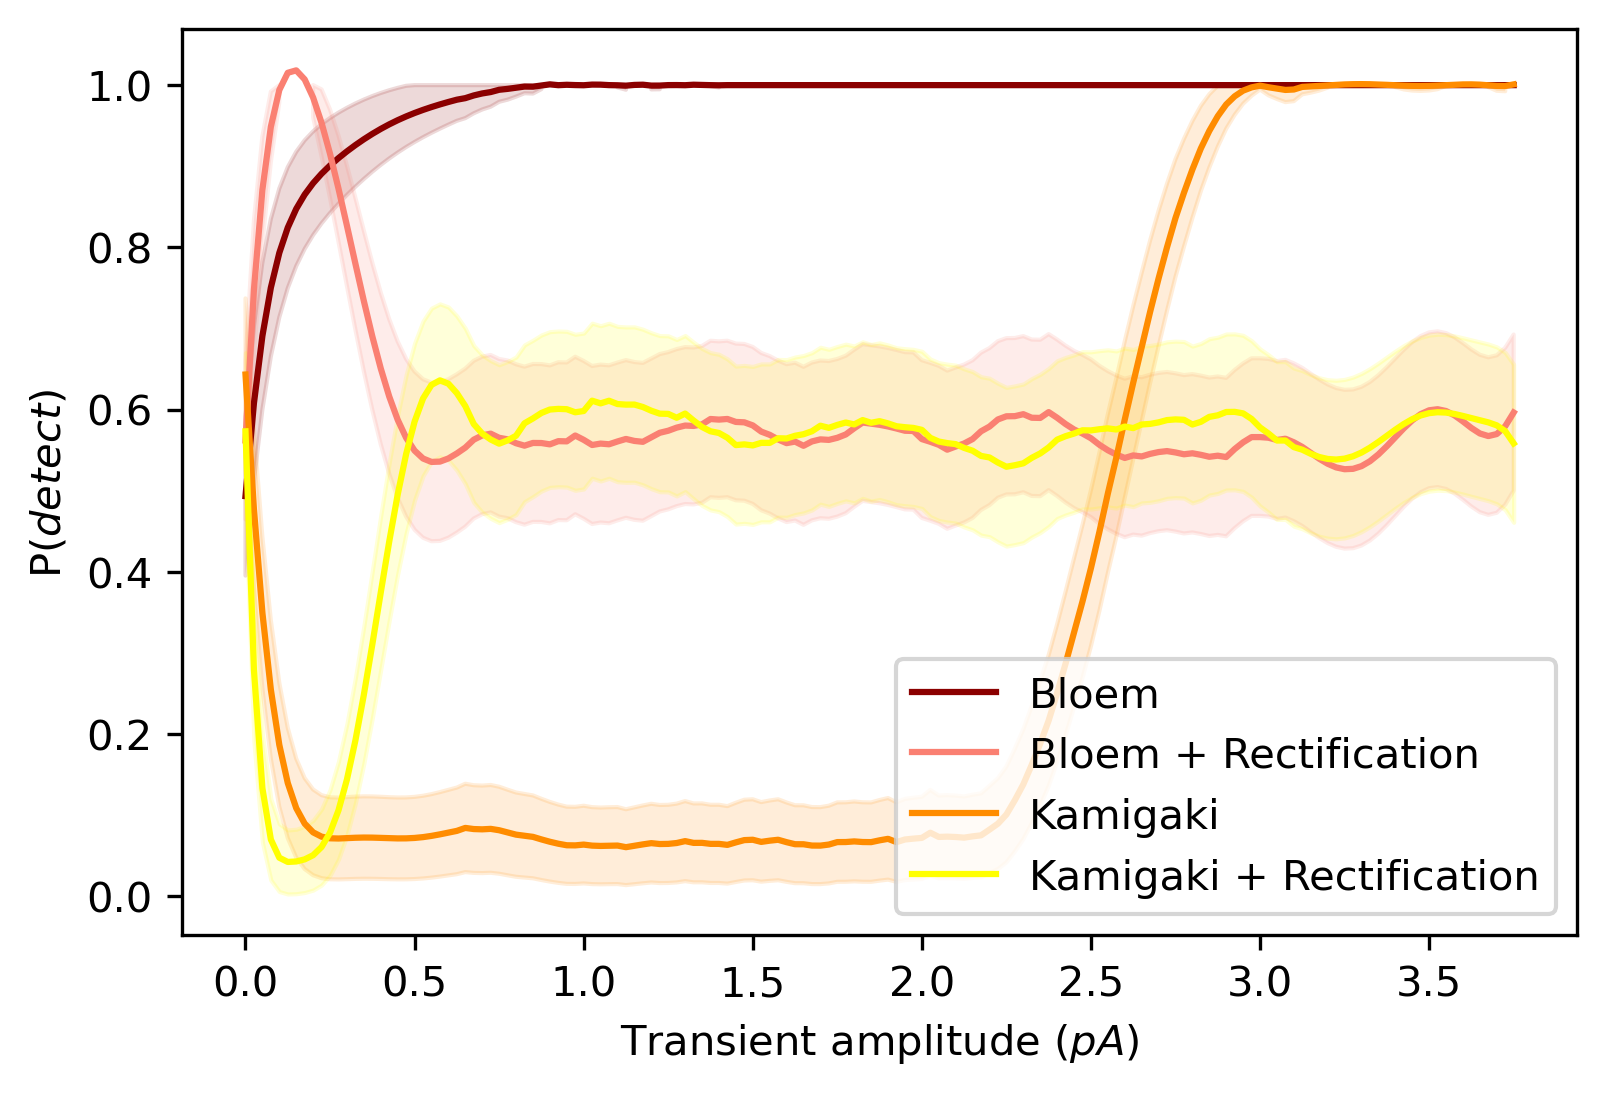

In [14]:
#fig, ax = plt.subplots(2,2, sharey = True) 

x = [0.025*i for i in range(len(nicTrans))]

plt.figure(dpi = 300)

plt.plot(x, nicTrans, color = 'darkred')
plt.plot(x, nicTrans_norm, color = 'salmon')
plt.plot(x, nicTrans_kam, color = 'darkorange')
plt.plot(x, nicTrans_kam_norm, color = 'yellow')

error = proportion_confint(nicTrans*100, 100, 0.05)
error_kam = proportion_confint(nicTrans_kam*100, 100, 0.05)
error_norm = proportion_confint(nicTrans_norm*100, 100, 0.05)
error_kam_norm = proportion_confint(nicTrans_kam_norm*100, 100, 0.05)

plt.fill_between(x, error[0], error[1], alpha = 0.15, color = 'darkred')
plt.fill_between(x, error_norm[0], error_norm[1], alpha = 0.15, color = 'salmon')
plt.fill_between(x, error_kam[0], error_kam[1], alpha = 0.15, color = 'darkorange')
plt.fill_between(x, error_kam_norm[0], error_kam_norm[1], alpha = 0.15, color = 'yellow')

'''
ax[0,0].set(title = 'Bloem')
ax[0,1].set(title = 'Kamigaki')
ax[1,0].set(title = 'Bloem + normalization')
ax[1,1].set(title = 'Kamigaki + normalization') # Strange...
'''

plt.legend(('Bloem', 'Bloem + Rectification', 'Kamigaki', 'Kamigaki + Rectification'))
plt.ylabel('P($detect$)')
plt.xlabel('Transient amplitude ($pA$)')
#plt.tight_layout()
plt.savefig('plots/Fig5/A-Four_different_hypothesis_v2.jpg', dpi = 300)
# Kamigaki alone only starts to rise for unrealistic values of transient amplitude. 
# Let's only go for Bloem alone + Kamigaki x normalization
# Both with amplitude of 0.75

# btw we fix alpha5 SNP to correspond to 

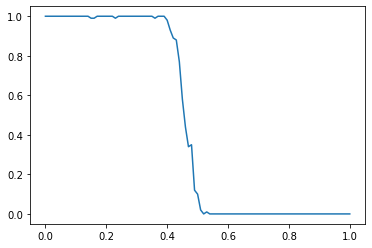

In [9]:
x = [0.01*i for i in range(len(a5nicTrans_bloem))]
plt.plot(x, a5nicTrans_bloem)
# Do we conclude that a5SNP X Bloem interaction unlikely ?.. 

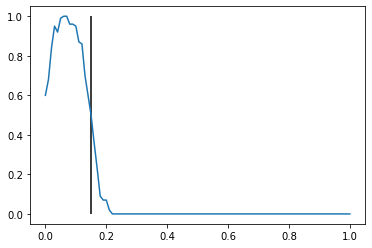

In [27]:
x = [0.01*i for i in range(len(a5nicTrans_bloem))]
plt.plot(x, a5nicTrans_kamigaki)
plt.vlines(x = 0.15, ymin =0, ymax = 1) 
# This effect because for some reason VIP starts by stabilizing trace ? 

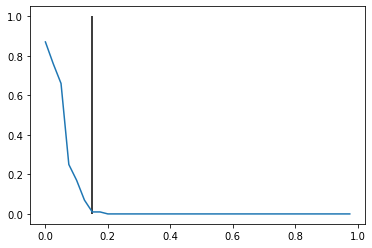

In [28]:
# NO TRANSIENT - Not very relevant situation though
x = [0.025*i for i in range(len(np.flip(load_vip)[60:100]))]
plt.plot(x, np.flip(load_vip)[60:100]) # Steps of 0025 --> take first fourth
plt.vlines(x = 0.15, ymin =0, ymax = 1) 
# ADD A CONDITION WITH NO TRANSIENT

### Impact of alpha5SNP on encoding : Bloem vs Kamigaki

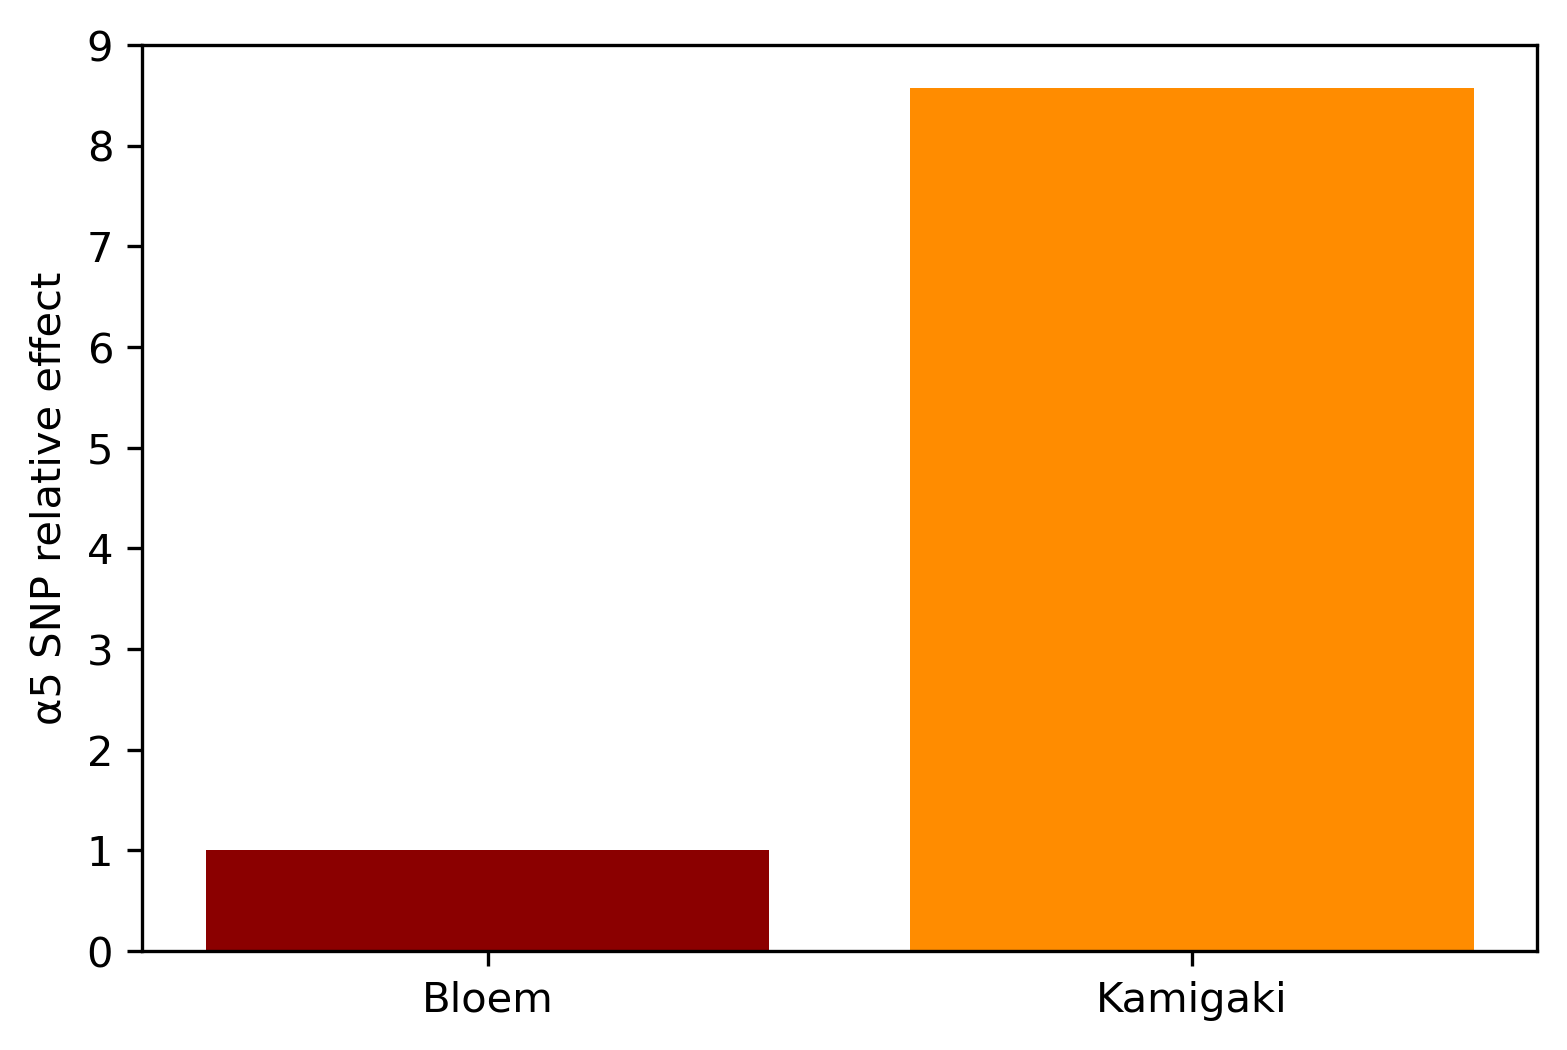

In [31]:
a5effect_bloem = a5nicTrans_bloem[0] / a5nicTrans_bloem[20]
a5effect_kamigaki = a5nicTrans_kamigaki[0] / a5nicTrans_kamigaki[20]

plt.figure(dpi = 300)
plt.bar((0,1), (a5effect_bloem, a5effect_kamigaki), color = ('darkred', 'darkorange'), tick_label = ('Bloem', 'Kamigaki'))
plt.ylabel('\u03B15 SNP relative effect')
plt.savefig('plots/Fig5/B-a5SNP_effect_bloem_kam.jpg')

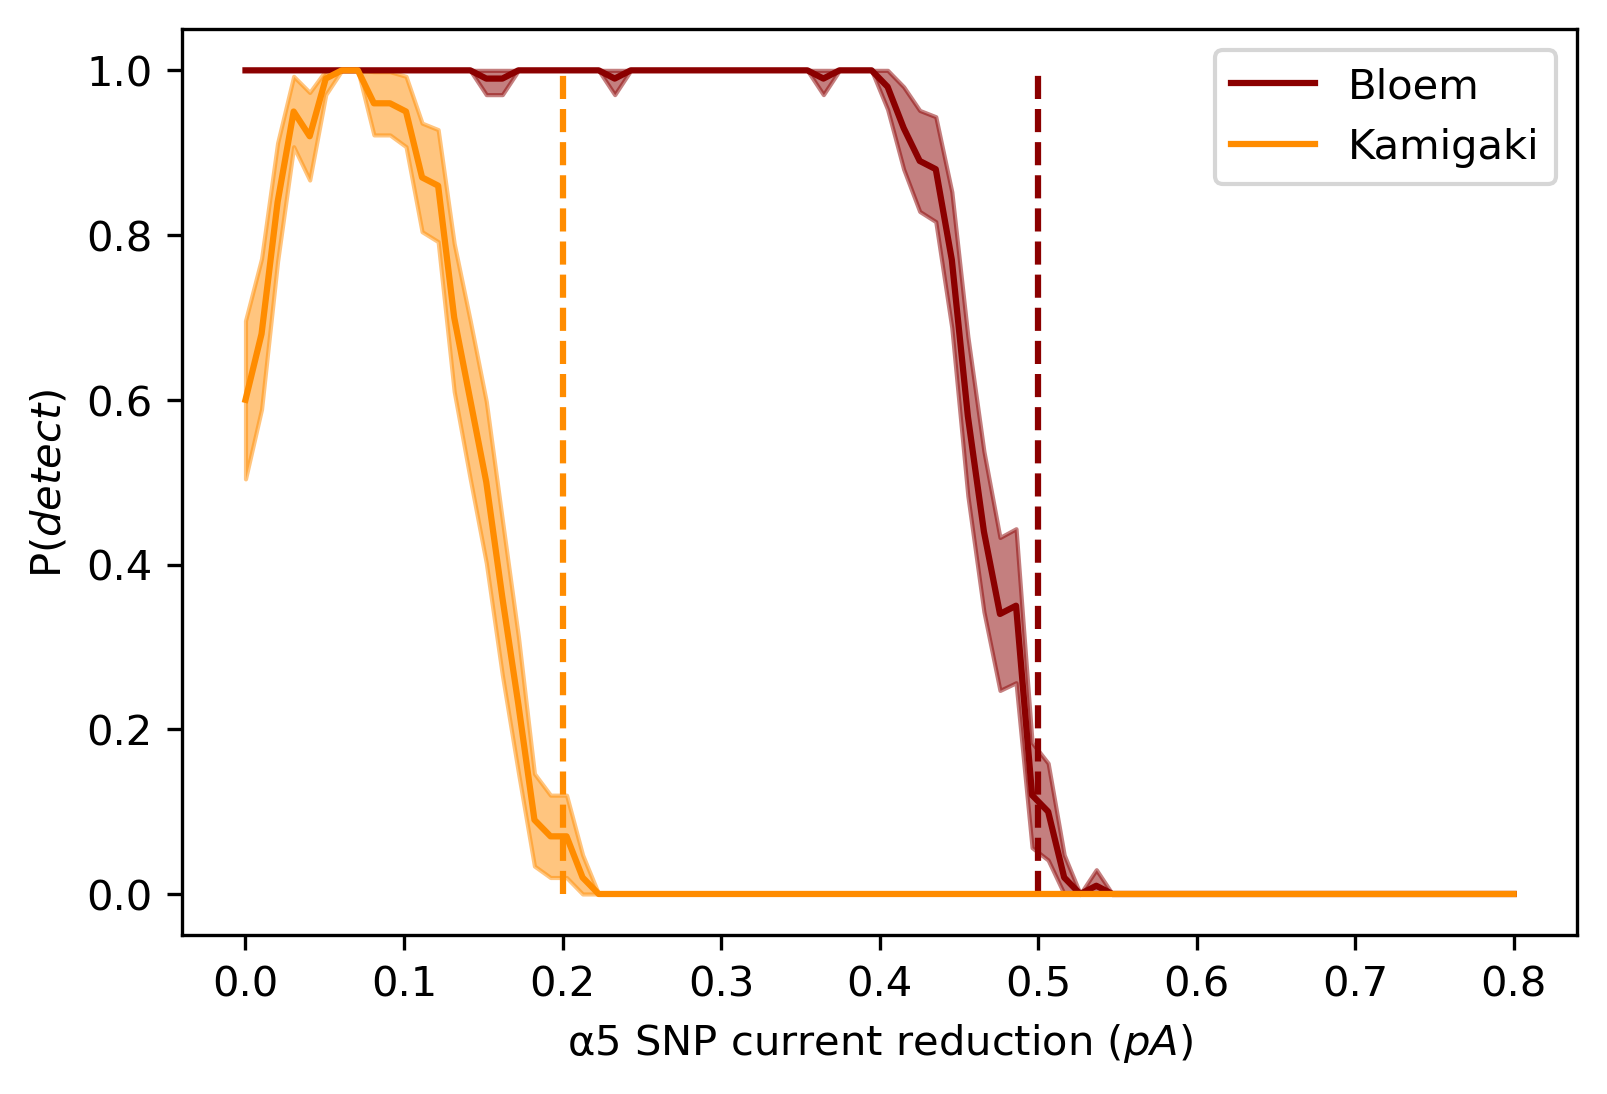

In [14]:
plt.figure(dpi = 300)

error_bloem = proportion_confint(a5nicTrans_bloem[:80]*100, 100, 0.05)
error_kam = proportion_confint(a5nicTrans_kamigaki[:80]*100, 100, 0.05)

x = np.linspace(0,0.8,80)

plt.plot(x, a5nicTrans_bloem[:80], color = 'darkred')
plt.plot(x, a5nicTrans_kamigaki[:80], color = 'darkorange')

plt.fill_between(x, error_bloem[0], error_bloem[1], alpha = 0.5, color = 'darkred', zorder = 1)
plt.fill_between(x, error_kam[0], error_kam[1], alpha = 0.5, color = 'darkorange', zorder = 2)

plt.vlines(x = 0.2, ymin =0, ymax = 1, linestyle = '--', color = 'darkorange')
plt.vlines(x = 0.5, ymin =0, ymax = 1, linestyle = '--', color = 'darkred')

plt.legend(('Bloem', 'Kamigaki'), loc = 'upper right')
plt.ylabel('P($detect$)')
plt.xlabel('\u03B15 SNP current reduction ($pA$)')

#plt.savefig('plots/Fig5/B-a5SNP_effect_bloem_kam_v2.jpg')

In [144]:
error_kam

(array([0.29440277, 0.23784   , 0.29440277, 0.21935299, 0.22857235,
        0.26592173, 0.16513107, 0.17402927, 0.13016905, 0.04867473,
        0.07199179, 0.06408574, 0.08001529, 0.02682751, 0.04120108,
        0.0199921 , 0.04867473, 0.03390941, 0.        , 0.00159271,
        0.        , 0.00159271, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ,        nan, 0.        ,        nan,
               nan, 0.        , 0.        , 0.        , 0.        ,
        0.        ,        nan, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ,        nan, 0.        ,
        0.        ,        nan, 0.        , 0.        , 0.        ,
        0.        , 0.        ,        nan, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ,        nan,
               nan,        nan, 0.        , 0.  

### Restoration by nicotine

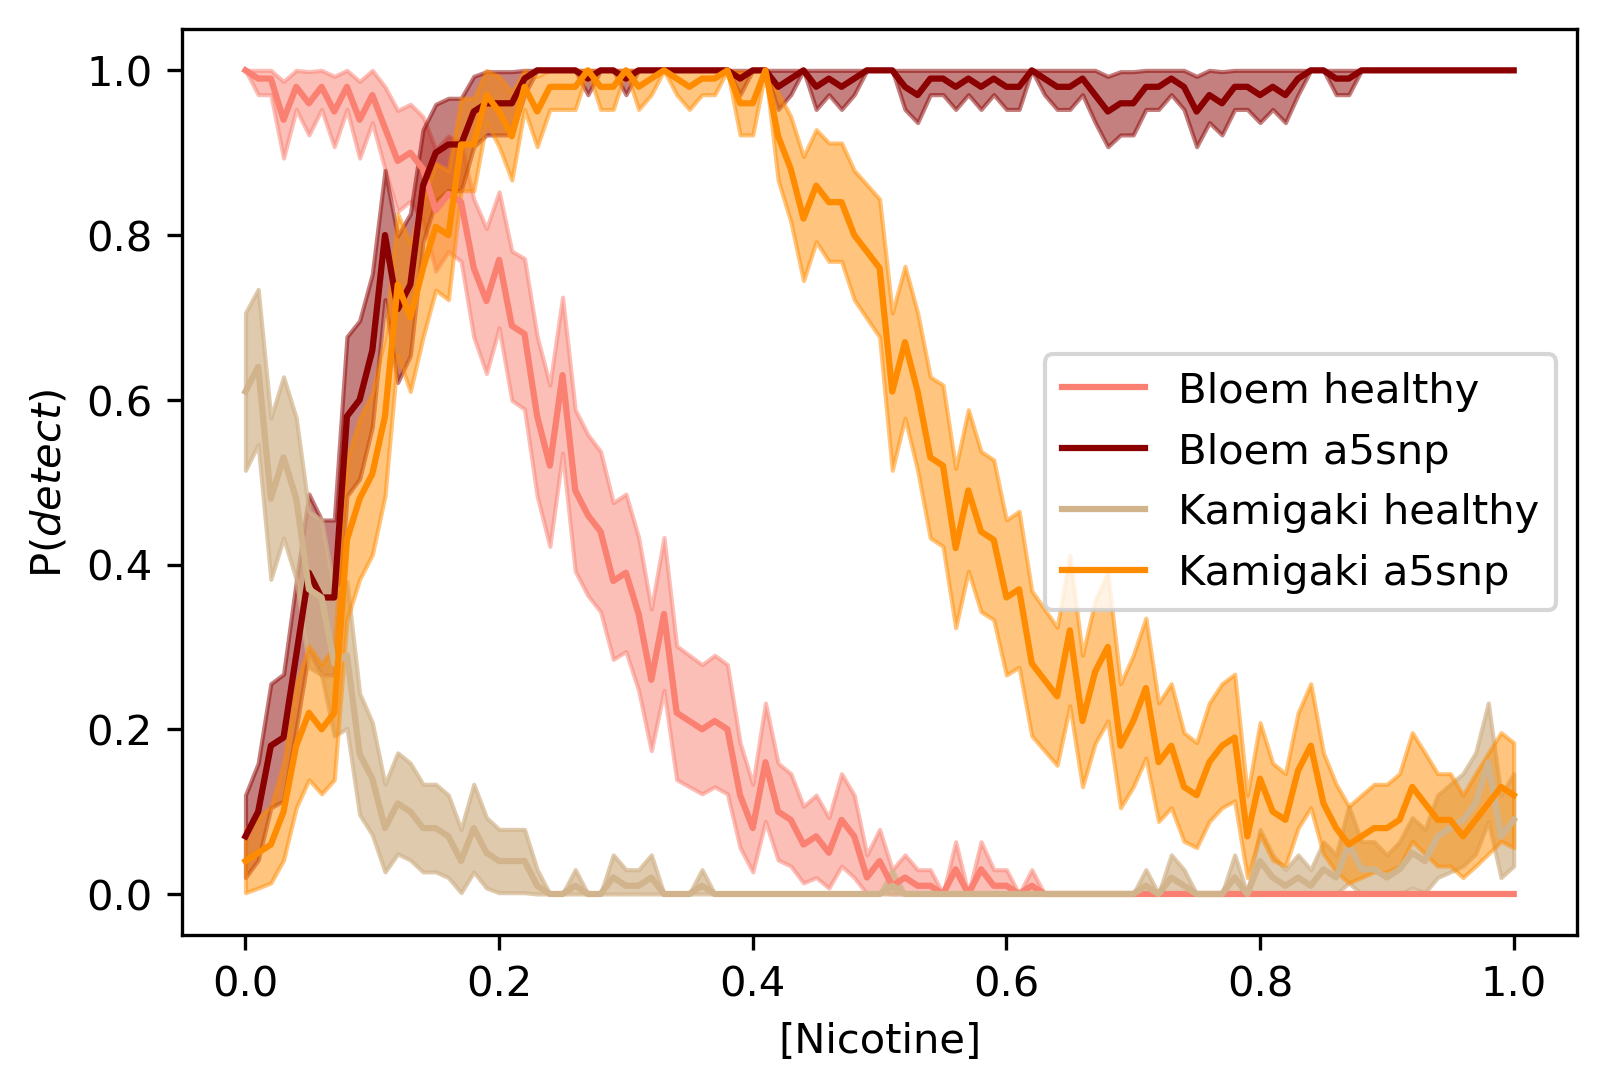

In [15]:
x = [0.01*i for i in range(len(nicotine_bloem_healthy))]

plt.figure(dpi = 300)

for (stat, color) in zip([nicotine_bloem_healthy, nicotine_bloem_a5snp, nicotine_kamigaki_healthy, nicotine_kamigaki_a5snp], ('salmon', 'darkred', 'tan', 'darkorange')):
    plt.plot(x, stat, color = color)
    
error_bloem = proportion_confint(nicotine_bloem_healthy*100, 100, 0.05)
error_bloem_a5snp = proportion_confint(nicotine_bloem_a5snp*100, 100, 0.05)
error_kam = proportion_confint(nicotine_kamigaki_healthy*100, 100, 0.05)
error_kam_a5snp = proportion_confint(nicotine_kamigaki_a5snp*100, 100, 0.05)

plt.fill_between(x, error_bloem[0], error_bloem[1], alpha = 0.5, color = 'salmon')
plt.fill_between(x, error_bloem_a5snp[0], error_bloem_a5snp[1], alpha = 0.5, color = 'darkred')
plt.fill_between(x, error_kam[0], error_kam[1], alpha = 0.7, color = 'tan')
plt.fill_between(x, error_kam_a5snp[0], error_kam_a5snp[1], alpha = 0.5, color = 'darkorange')

plt.xlabel('[Nicotine]')
plt.ylabel('P($detect$)')
plt.legend(['Bloem healthy', 'Bloem a5snp', 'Kamigaki healthy', 'Kamigaki a5snp'])

#plt.savefig('plots/Fig5/C-Nicotine_restoration.jpg', dpi = 300)